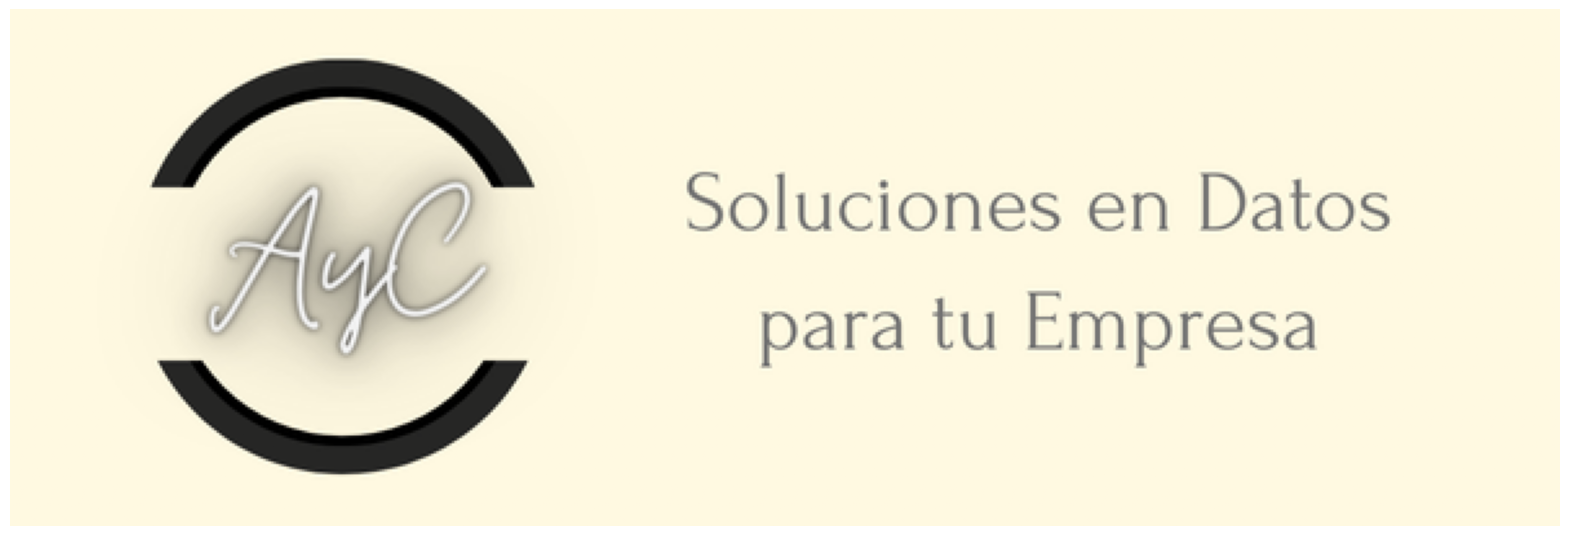

In [4]:
r.Imagen('/content/drive/MyDrive/NoCountry_RiesgoCrediticio/banner_consultora_ayc.png', (20,10))

#### Para Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importaciones

In [3]:
import numpy as np
import pandas as pd
import os # en el caso que se trabaje en el entorno de colab

os.chdir('/content/drive/MyDrive/NoCountry_RiesgoCrediticio/recursos_y_notebooks') # en el caso de que se trabaje en google colab

%load_ext autoreload
%autoreload 2

import resources as r

# Este codigo Pone un limite grande para el ancho y sin limite para el largo de un output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.width', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <h1 align= 'center'><u><strong></strong>Datos</u></h1>

En Principio, los datos con los que contamos y vamos a trabajar referidos a la tematica de proyecto, son de diferentes origenes, aunque principalmente se obtienen de la plataforma web de datos publicos de la nacion (tanto en Datos Argentina como en los diferenetes ministerios o la plataforma de la nación)

Detallamos los origenes principales:

* https://datos.gob.ar/
* https://www.argentina.gob.ar/

--------------||--------------------

fundamentar la eleccion de estas fuentes de datos, desarrollar el valor que se puede obtener de los mismos, explicar brevemente de que se tratan en general y como se va a realizar el desarrollo del analisis en general (o sea de este informe etl preliminar)

--------------||--------------------

### Instanciamos los dataframes

In [5]:
no_convencional = pd.read_csv('../raw/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv')

In [6]:
pozos = pd.read_csv('../raw/capitulo-iv-pozos.csv')

In [8]:
prod_gyp_2020 = pd.read_csv('../raw/produccin-de-pozos-de-gas-y-petrleo-2020.csv')

In [9]:
prod_gyp_2021 = pd.read_csv('../raw/produccin-de-pozos-de-gas-y-petrleo-2021.csv')

In [10]:
prod_gyp_2022 = pd.read_csv('../raw/produccin-de-pozos-de-gas-y-petrleo-2022.csv')

In [11]:
prod_gyp_2023 = pd.read_csv('../raw/produccin-de-pozos-de-gas-y-petrleo-2023.csv')

In [12]:
prod_gyp_2024 = pd.read_csv('../raw/produccin-de-pozos-de-gas-y-petrleo-2024.csv')

In [13]:
precio_mundial = pd.read_csv('../raw/Precios petroleo mundia desde 1970.csv')

In [15]:
ppw = pd.read_csv('../raw/Petrol Price Worldwide.csv', encoding= 'ISO-8859-1')

In [16]:
prod_p_09_a_18 = pd.read_csv('../raw/Produccion petroleras ARG 2009 - 2018.csv', encoding= 'ISO-8859-1')

In [18]:
nasdaq = pd.read_csv('../raw/YPF NASDAQ.csv', encoding= 'ascii')

# <h1 align= 'center'><u><strong></strong>Análisis</u></h1>

## Produccion de pozos de gas y petroleo no convencional

### Informe general

In [22]:
r.informe_dataframe(no_convencional)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 303393
Columnas: 40

--Numero de datos--
11547859

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 303392
Columnas: ['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data']

--Tipo de columnas--
idempresa                  object
anio                        int64
mes                         int64
idpozo                      int64
prod_pet                

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [23]:
r.verificar_tipo_datos(no_convencional)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%   nulos
0                idempresa                   [<class 'str'>]      100.00     0.00       0
1                     anio                   [<class 'int'>]      100.00     0.00       0
2                      mes                   [<class 'int'>]      100.00     0.00       0
3                   idpozo                   [<class 'int'>]      100.00     0.00       0
4                 prod_pet                 [<class 'float'>]      100.00     0.00       0
5                 prod_gas                 [<class 'float'>]      100.00     0.00       0
6                prod_agua                 [<class 'float'>]      100.00     0.00       0
7                 iny_agua                 [<class 'float'>]      100.00     0.00       0
8                  iny_gas                 [<class 'float'>]      100.00     0.00       0
9                  iny_co2                 [<class 'float'>]      100.00     0.00       0
10                iny_otro                 [<class 'float'>]      100.00     0.00       0
11                     tef                 [<class 'float'>]      100.00     0.00       0
12               vida_util                 [<class 'float'>]        2.03    97.97  297223
13          tipoextraccion  [<class 'str'>, <class 'float'>]       99.81     0.19     563
14              tipoestado  [<class 'str'>, <class 'float'>]       99.81     0.19     563
15                tipopozo  [<class 'str'>, <class 'float'>]       99.81     0.19     563
16           observaciones  [<class 'float'>, <class 'str'>]        5.41    94.59  286965
17            fechaingreso                   [<class 'str'>]      100.00     0.00       0
18             rectificado                   [<class 'str'>]      100.00     0.00       0
19              habilitado                   [<class 'str'>]      100.00     0.00       0
20               idusuario                   [<class 'int'>]      100.00     0.00       0
21                 empresa                   [<class 'str'>]      100.00     0.00       0
22                   sigla                   [<class 'str'>]      100.00     0.00       0
23                formprod                   [<class 'str'>]      100.00     0.00       0
24             profundidad                 [<class 'float'>]      100.00     0.00       0
25               formacion                   [<class 'str'>]      100.00     0.00       0
26  idareapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
27    areapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
28        idareayacimiento                   [<class 'str'>]      100.00     0.00       0
29          areayacimiento                   [<class 'str'>]      100.00     0.00       0
30                  cuenca                   [<class 'str'>]      100.00     0.00       0
31               provincia                   [<class 'str'>]      100.00     0.00       0
32             coordenadax                 [<class 'float'>]      100.00     0.00       0
33             coordenaday                 [<class 'float'>]      100.00     0.00       0
34         tipo_de_recurso                   [<class 'str'>]      100.00     0.00       0
35                proyecto                   [<class 'str'>]      100.00     0.00       0
36           clasificacion  [<class 'str'>, <class 'float'>]       99.73     0.27     818
37        subclasificacion  [<class 'str'>, <class 'float'>]       99.73     0.27     818
38        sub_tipo_recurso  [<class 'str'>, <class 'float'>]       99.89     0.11     348
39              fecha_data                   [<class 'str'>]      100.00     0.00       0

### Informe particular

In [24]:
for columna in no_convencional:
  r.informe_columna(no_convencional, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE idempresa:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
42

--Valores unicos en la columna (Primeros 5 valores)--
['YSUR' 'YPF' 'WIN' 'WDA' 'VST']

--Moda de la columna especificada--
Valor modal -----> YPF
Frecuencia acumulada ------> 170358

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 idempresa
YPF    170358
APS     16678
PLU     15894
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE anio:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [2018 2015 2017 2016 2022]  -----> Desde 2018  Hasta 2012

--Estadisticos Principales de la columna--
Media: 2019.25
Desviacion Estandar: 3.75
Primer cuartil:

### Gráficos

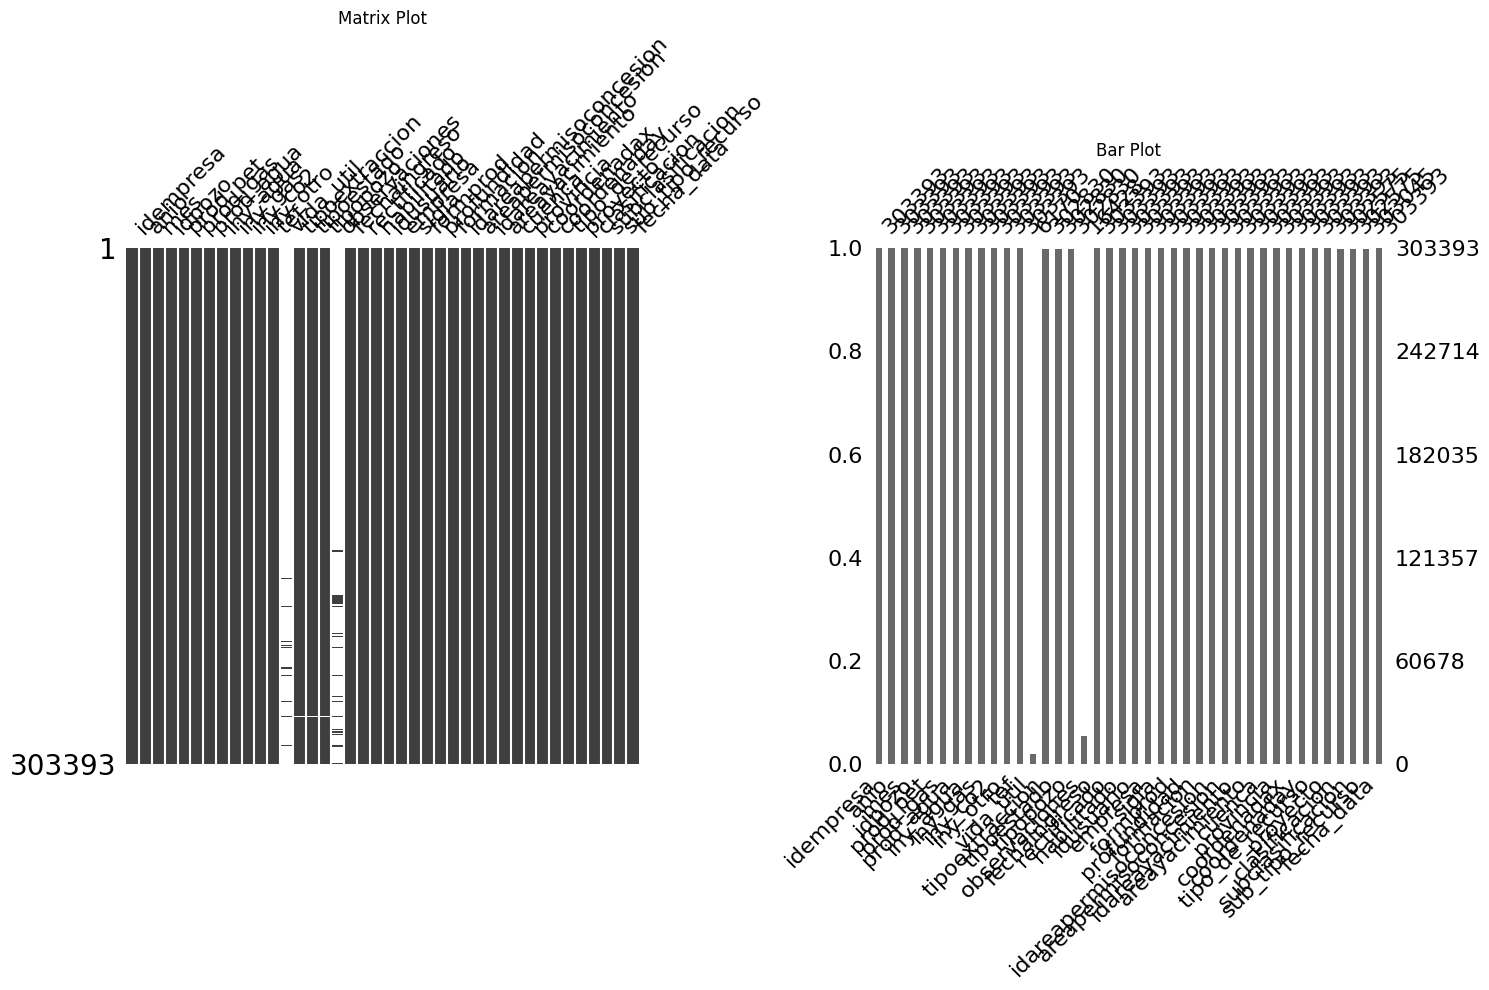

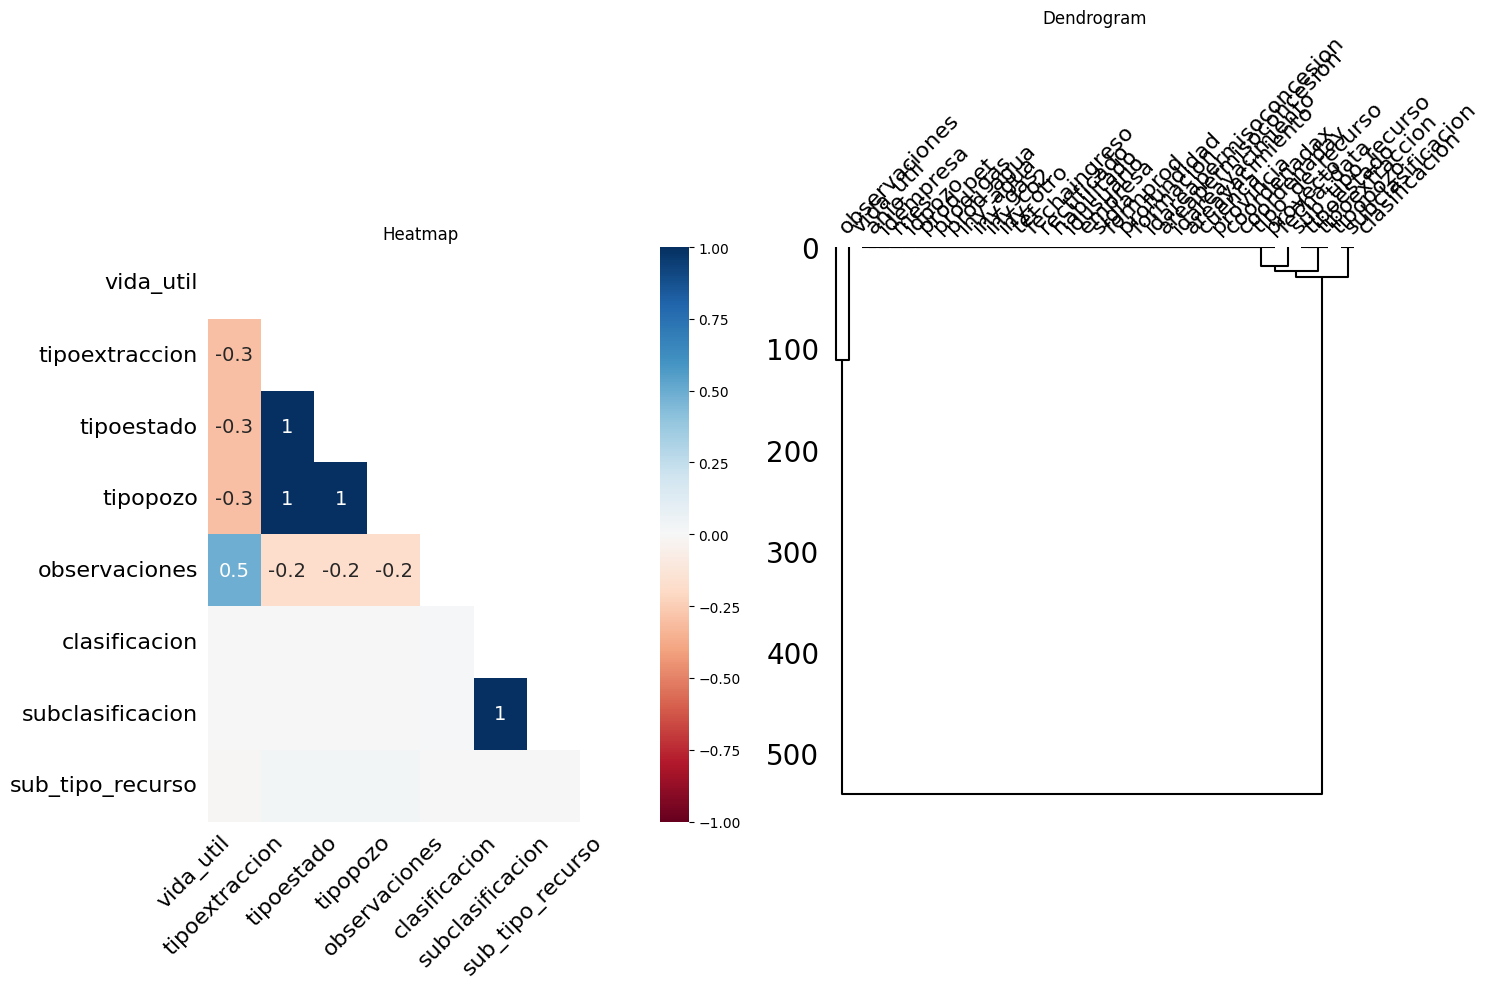

In [25]:
r.visualizar_nulos(no_convencional)

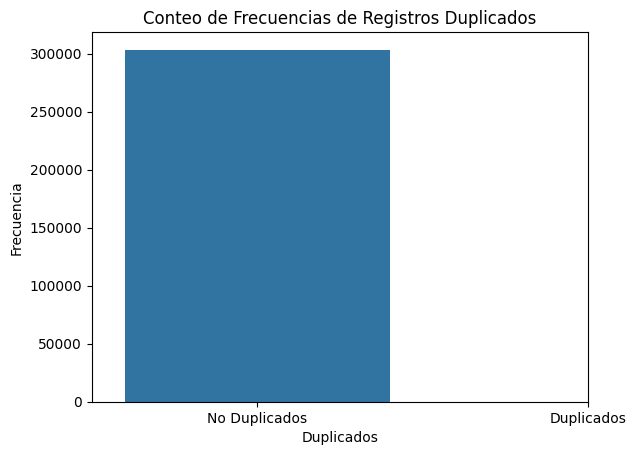

In [26]:
r.hist_duplicados(no_convencional)

## Pozos

### Informe general

In [27]:
r.informe_dataframe(pozos)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 83990
Columnas: 26

--Numero de datos--
2038459

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 83989
Columnas: ['sigla', 'idpozo', 'area', 'cod_area', 'empresa', 'yacimiento', 'cod_yacimiento', 'formacion', 'cuenca', 'provincia', 'cota', 'profundidad', 'clasificacion', 'subclasificacion', 'tipo_recurso', 'sub_tipo_recurso', 'gasplus', 'tipopozo', 'tipoextraccion', 'tipoestado', 'adjiv_fecha_inicio_perf', 'adjiv_fecha_fin_perf', 'adjiv_fecha_inicio_term', 'adjiv_fecha_fin_term', 'geojson', 'geom']

--Tipo de columnas--
sigla                       object
idpozo                       int64
area                        object
cod_area                    object
empresa                     object
yacimiento                  object
cod_yacimiento              object
formacion                   object
cuenca                      object
provincia            

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [28]:
r.verificar_tipo_datos(pozos)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%  nulos
0                     sigla                   [<class 'str'>]      100.00     0.00      0
1                    idpozo                   [<class 'int'>]      100.00     0.00      0
2                      area                   [<class 'str'>]      100.00     0.00      0
3                  cod_area                   [<class 'str'>]      100.00     0.00      0
4                   empresa  [<class 'str'>, <class 'float'>]       98.96     1.04    874
5                yacimiento                   [<class 'str'>]      100.00     0.00      0
6            cod_yacimiento                   [<class 'str'>]      100.00     0.00      0
7                 formacion  [<class 'str'>, <class 'float'>]       96.65     3.35   2815
8                    cuenca                   [<class 'str'>]      100.00     0.00      0
9                 provincia                   [<class 'str'>]      100.00     0.00      0
10                     cota                 [<class 'float'>]      100.00     0.00      0
11              profundidad                 [<class 'float'>]      100.00     0.00      0
12            clasificacion                   [<class 'str'>]      100.00     0.00      0
13         subclasificacion                   [<class 'str'>]      100.00     0.00      0
14             tipo_recurso                   [<class 'str'>]      100.00     0.00      0
15         sub_tipo_recurso                   [<class 'str'>]      100.00     0.00      0
16                  gasplus                   [<class 'str'>]      100.00     0.00      0
17                 tipopozo                   [<class 'str'>]      100.00     0.00      0
18           tipoextraccion                   [<class 'str'>]      100.00     0.00      0
19               tipoestado                   [<class 'str'>]      100.00     0.00      0
20  adjiv_fecha_inicio_perf  [<class 'str'>, <class 'float'>]       59.35    40.65  34141
21     adjiv_fecha_fin_perf  [<class 'str'>, <class 'float'>]       59.18    40.82  34286
22  adjiv_fecha_inicio_term  [<class 'str'>, <class 'float'>]       56.44    43.56  36583
23     adjiv_fecha_fin_term  [<class 'str'>, <class 'float'>]       56.44    43.56  36582
24                  geojson                   [<class 'str'>]      100.00     0.00      0
25                     geom                   [<class 'str'>]      100.00     0.00      0

### Informe particular

In [29]:
for columna in pozos:
  r.informe_columna(pozos, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE sigla:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
76783

--Valores unicos en la columna (Primeros 5 valores)--
['CH.CH.EaLE.x-1' 'CH.CH.EaLE.x-2' 'CH.CH.EaLE-3' 'CH.CH.EaLE-4'
 'CH.CH.EaLE-5']

--Moda de la columna especificada--
Valor modal -----> APCO.Ch.CR.x-7
Frecuencia acumulada ------> 11

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 sigla
APCO.Ch.CR.x-7     11
YPF.Nq.EL-3         5
YPF.Md.NMDM.e-4     5
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE idpozo:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [212 213 214 215 216]  -----> Desde 212  Hasta 165400

--Estadisticos Principales

### Gráficos

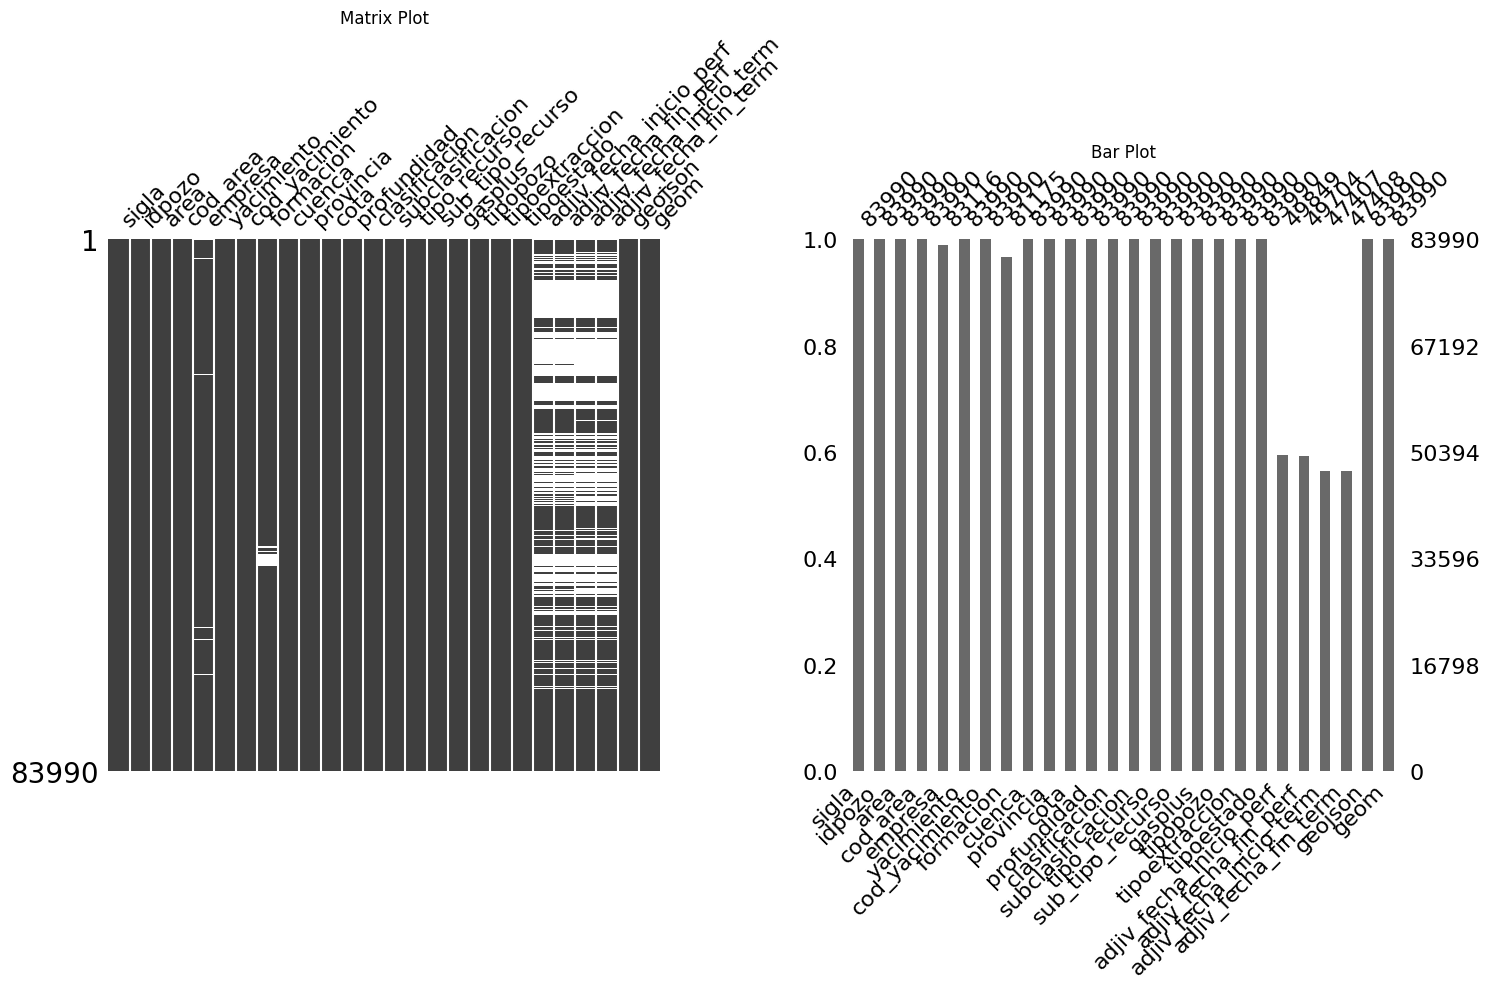

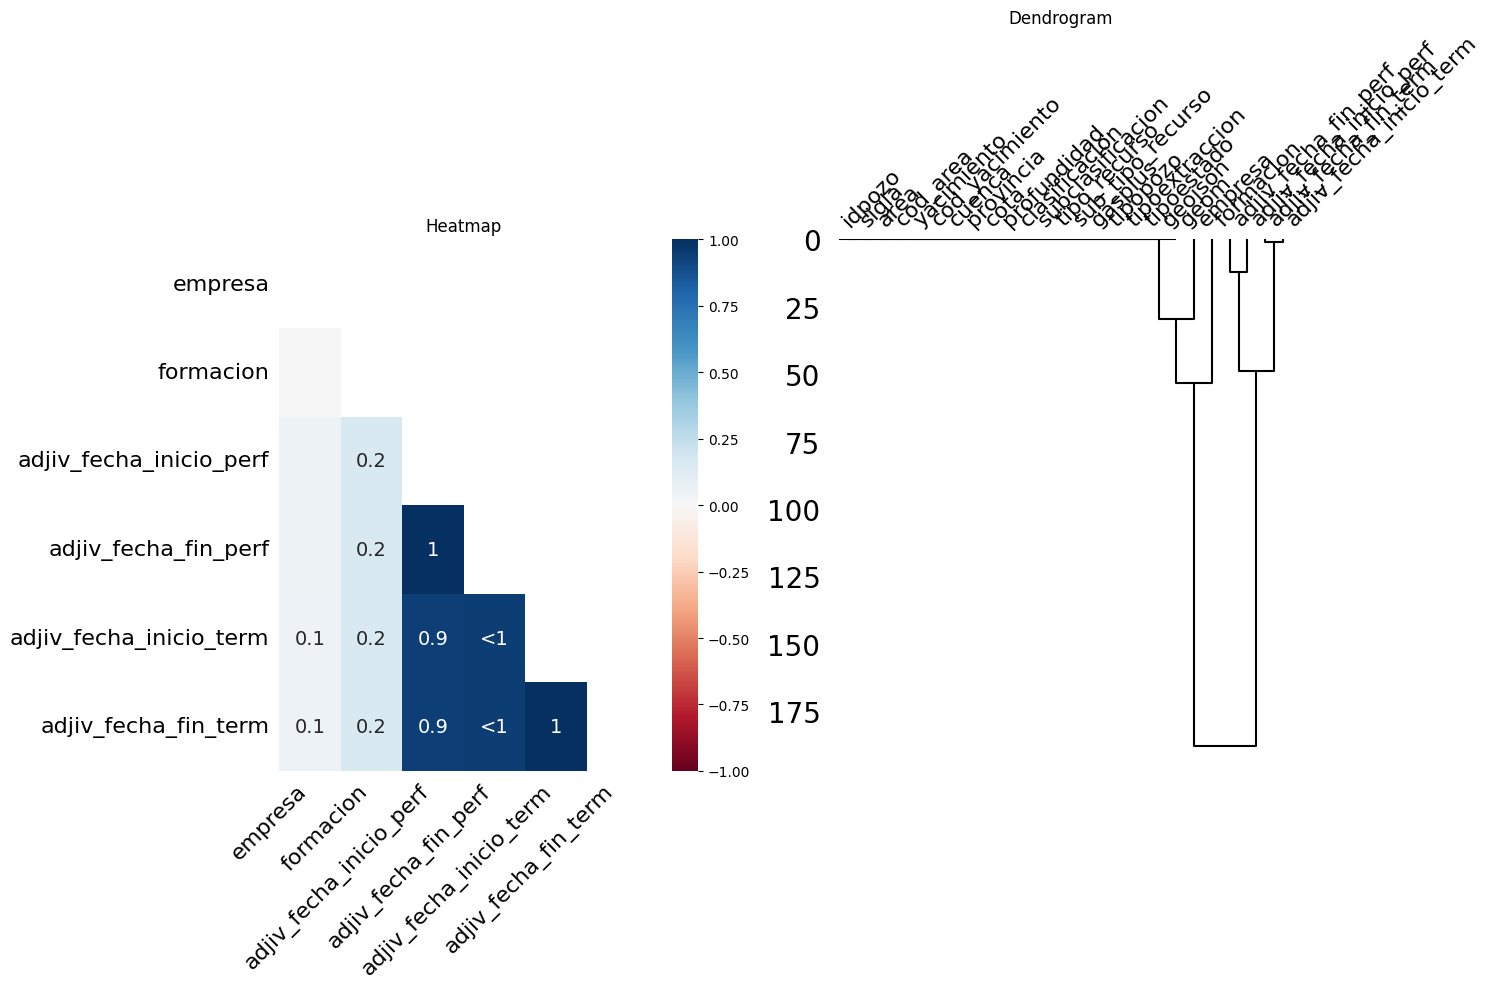

In [30]:
r.visualizar_nulos(pozos)

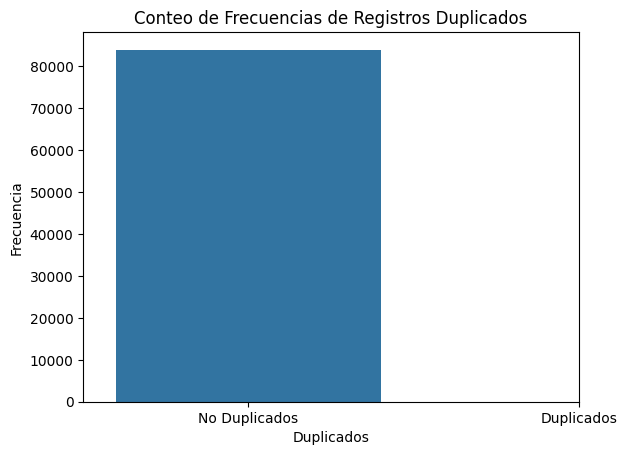

In [31]:
r.hist_duplicados(pozos)

## Produccion de gas y petroleo (2020)

### Informe general

In [32]:
r.informe_dataframe(prod_gyp_2020)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 953660
Columnas: 38

--Numero de datos--
33036239

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 953659
Columnas: ['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data']

--Tipo de columnas--
idempresa                  object
anio                        int64
mes                         int64
idpozo                      int64
prod_pet                  float64
prod_gas            

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [33]:
r.verificar_tipo_datos(prod_gyp_2020)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%   nulos
0                idempresa                   [<class 'str'>]      100.00     0.00       0
1                     anio                   [<class 'int'>]      100.00     0.00       0
2                      mes                   [<class 'int'>]      100.00     0.00       0
3                   idpozo                   [<class 'int'>]      100.00     0.00       0
4                 prod_pet                 [<class 'float'>]      100.00     0.00       0
5                 prod_gas                 [<class 'float'>]      100.00     0.00       0
6                prod_agua                 [<class 'float'>]      100.00     0.00       0
7                 iny_agua                 [<class 'float'>]      100.00     0.00       0
8                  iny_gas                 [<class 'float'>]      100.00     0.00       0
9                  iny_co2                 [<class 'float'>]      100.00     0.00       0
10                iny_otro                 [<class 'float'>]      100.00     0.00       0
11                     tef                 [<class 'float'>]      100.00     0.00       0
12               vida_util                 [<class 'float'>]        4.51    95.49  910634
13          tipoextraccion  [<class 'str'>, <class 'float'>]      100.00     0.00      36
14              tipoestado  [<class 'str'>, <class 'float'>]      100.00     0.00      36
15                tipopozo  [<class 'str'>, <class 'float'>]      100.00     0.00      36
16           observaciones  [<class 'float'>, <class 'str'>]        7.78    92.22  879508
17            fechaingreso                   [<class 'str'>]      100.00     0.00       0
18             rectificado                   [<class 'str'>]      100.00     0.00       0
19              habilitado                   [<class 'str'>]      100.00     0.00       0
20               idusuario                   [<class 'int'>]      100.00     0.00       0
21                 empresa                   [<class 'str'>]      100.00     0.00       0
22                   sigla                   [<class 'str'>]      100.00     0.00       0
23                formprod  [<class 'str'>, <class 'float'>]       96.63     3.37   32160
24             profundidad                 [<class 'float'>]      100.00     0.00       0
25               formacion  [<class 'str'>, <class 'float'>]       96.49     3.51   33515
26  idareapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
27    areapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
28        idareayacimiento                   [<class 'str'>]      100.00     0.00       0
29          areayacimiento                   [<class 'str'>]      100.00     0.00       0
30                  cuenca  [<class 'str'>, <class 'float'>]      100.00     0.00      36
31               provincia                   [<class 'str'>]      100.00     0.00       0
32         tipo_de_recurso                   [<class 'str'>]      100.00     0.00       0
33                proyecto                   [<class 'str'>]      100.00     0.00       0
34           clasificacion  [<class 'str'>, <class 'float'>]       77.72    22.28  212456
35        subclasificacion  [<class 'str'>, <class 'float'>]       77.72    22.28  212456
36        sub_tipo_recurso  [<class 'float'>, <class 'str'>]        3.32    96.68  921968
37              fecha_data                   [<class 'str'>]      100.00     0.00       0

### Informe particular

In [34]:
for columna in prod_gyp_2020:
  r.informe_columna(prod_gyp_2020, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE idempresa:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
58

--Valores unicos en la columna (Primeros 5 valores)--
['Z001' 'YPF' 'WDA' 'VNO' 'VIS']

--Moda de la columna especificada--
Valor modal -----> YPF
Frecuencia acumulada ------> 463005

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 idempresa
YPF     463005
PAL      93027
SINO     80196
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE anio:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [2020]  -----> Desde 2020  Hasta 2020

--Estadisticos Principales de la columna--
Media: 2020.0
Desviacion Estandar: 0.0
Primer cuartil: 2020.0
Mediana: 20

### Gráficos

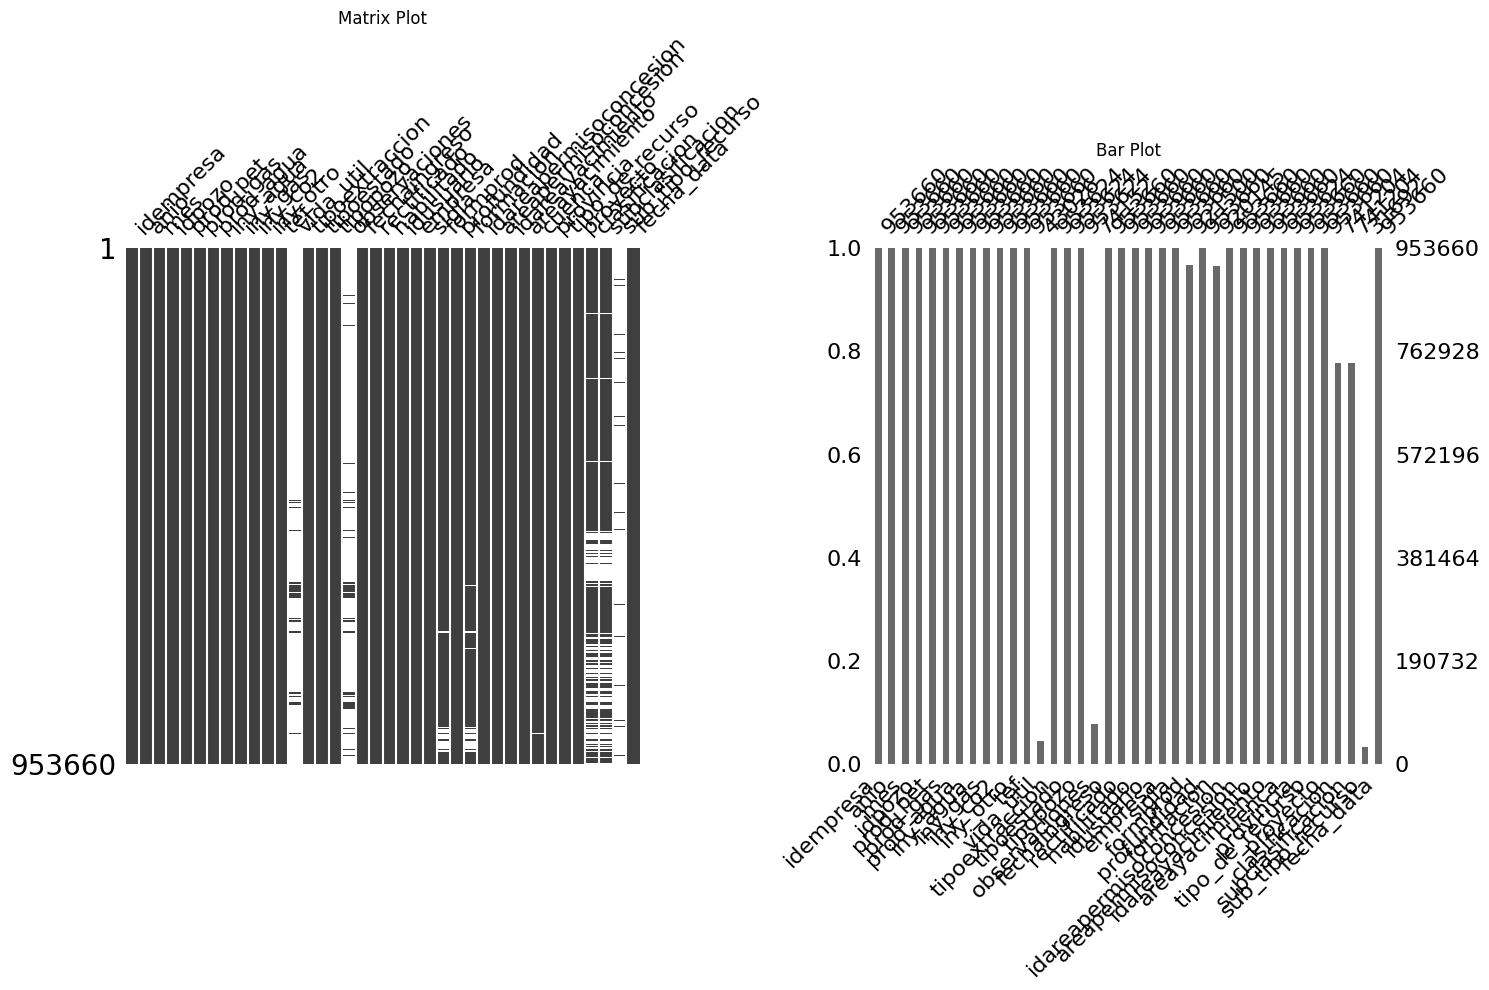

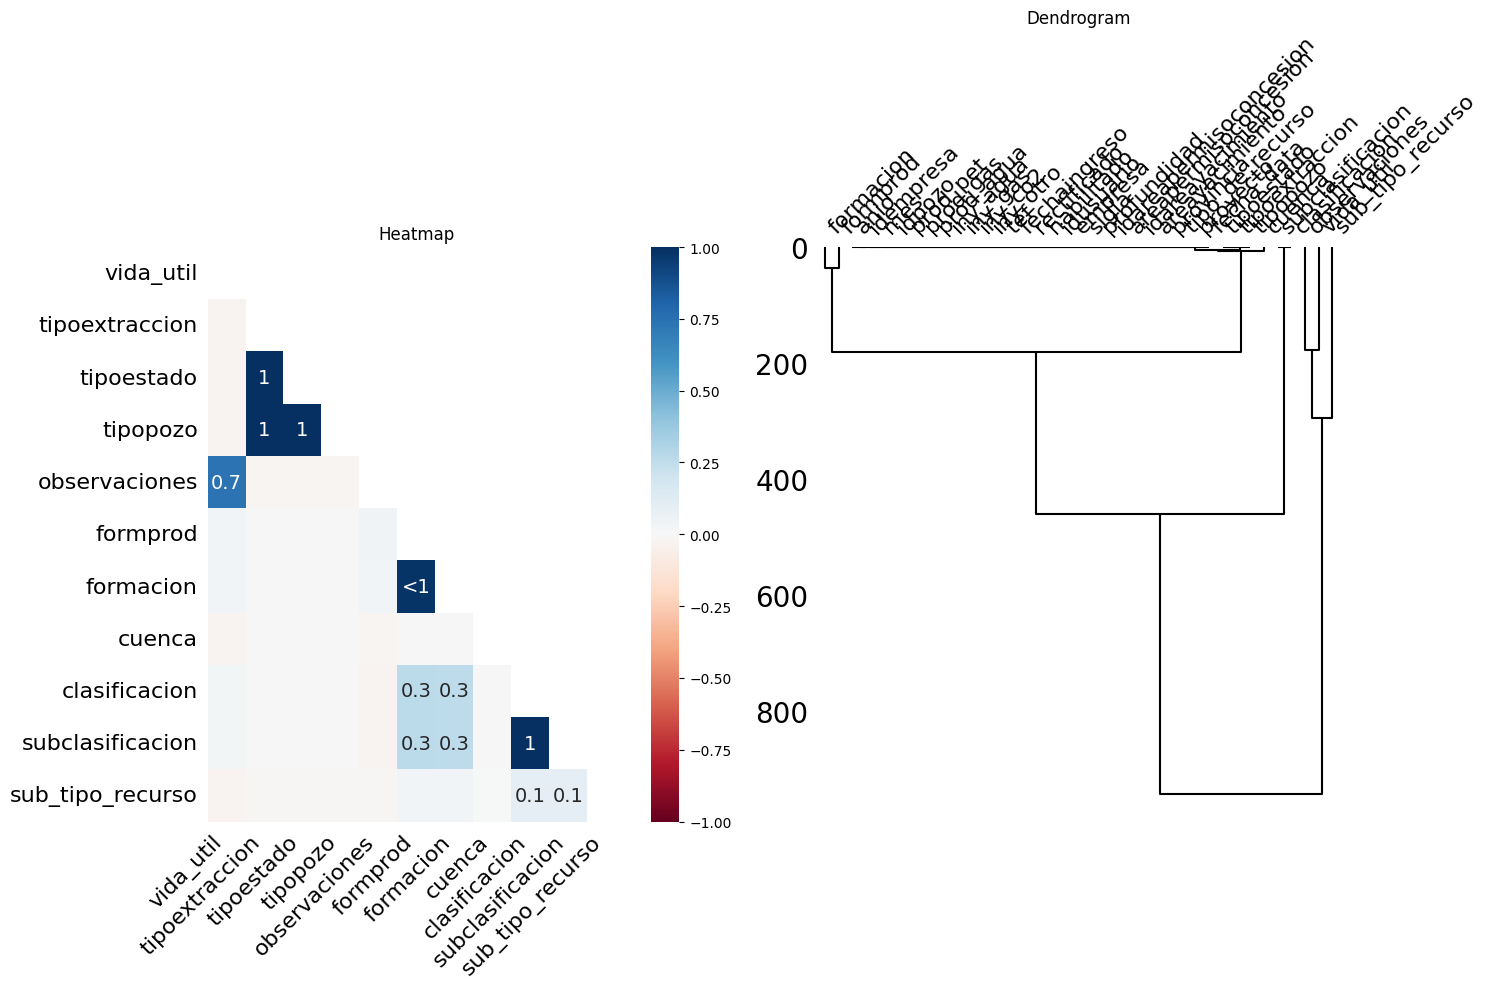

In [35]:
r.visualizar_nulos(prod_gyp_2020)

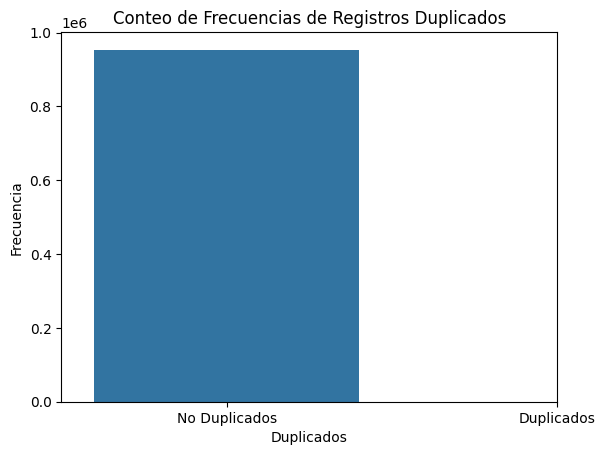

In [36]:
r.hist_duplicados(prod_gyp_2020)

## Produccion de gas y petroleo (2021)

### Informe general

In [37]:
r.informe_dataframe(prod_gyp_2021)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 961451
Columnas: 38

--Numero de datos--
33300601

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 961450
Columnas: ['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data']

--Tipo de columnas--
idempresa                  object
anio                        int64
mes                         int64
idpozo                      int64
prod_pet                  float64
prod_gas            

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [38]:
r.verificar_tipo_datos(prod_gyp_2021)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%   nulos
0                idempresa                   [<class 'str'>]      100.00     0.00       0
1                     anio                   [<class 'int'>]      100.00     0.00       0
2                      mes                   [<class 'int'>]      100.00     0.00       0
3                   idpozo                   [<class 'int'>]      100.00     0.00       0
4                 prod_pet                 [<class 'float'>]      100.00     0.00       0
5                 prod_gas                 [<class 'float'>]      100.00     0.00       0
6                prod_agua                 [<class 'float'>]      100.00     0.00       0
7                 iny_agua                 [<class 'float'>]      100.00     0.00       0
8                  iny_gas                 [<class 'float'>]      100.00     0.00       0
9                  iny_co2                 [<class 'float'>]      100.00     0.00       0
10                iny_otro                 [<class 'float'>]      100.00     0.00       0
11                     tef                 [<class 'float'>]      100.00     0.00       0
12               vida_util                 [<class 'float'>]        4.13    95.87  921768
13          tipoextraccion  [<class 'str'>, <class 'float'>]      100.00     0.00      38
14              tipoestado  [<class 'str'>, <class 'float'>]      100.00     0.00      38
15                tipopozo  [<class 'str'>, <class 'float'>]      100.00     0.00      38
16           observaciones  [<class 'str'>, <class 'float'>]        6.93    93.07  894839
17            fechaingreso                   [<class 'str'>]      100.00     0.00       0
18             rectificado                   [<class 'str'>]      100.00     0.00       0
19              habilitado                   [<class 'str'>]      100.00     0.00       0
20               idusuario                   [<class 'int'>]      100.00     0.00       0
21                 empresa                   [<class 'str'>]      100.00     0.00       0
22                   sigla                   [<class 'str'>]      100.00     0.00       0
23                formprod  [<class 'str'>, <class 'float'>]       96.66     3.34   32160
24             profundidad                 [<class 'float'>]      100.00     0.00       0
25               formacion  [<class 'str'>, <class 'float'>]       96.51     3.49   33516
26  idareapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
27    areapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
28        idareayacimiento                   [<class 'str'>]      100.00     0.00       0
29          areayacimiento                   [<class 'str'>]      100.00     0.00       0
30                  cuenca  [<class 'str'>, <class 'float'>]      100.00     0.00      36
31               provincia                   [<class 'str'>]      100.00     0.00       0
32         tipo_de_recurso                   [<class 'str'>]      100.00     0.00       0
33                proyecto                   [<class 'str'>]      100.00     0.00       0
34           clasificacion  [<class 'str'>, <class 'float'>]       77.89    22.11  212558
35        subclasificacion  [<class 'str'>, <class 'float'>]       77.89    22.11  212558
36        sub_tipo_recurso  [<class 'float'>, <class 'str'>]        3.58    96.42  926988
37              fecha_data                   [<class 'str'>]      100.00     0.00       0

### Informe particular

In [39]:
for columna in prod_gyp_2021:
  r.informe_columna(prod_gyp_2021, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE idempresa:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
57

--Valores unicos en la columna (Primeros 5 valores)--
['Z001' 'YPF' 'WDA' 'VNO' 'VIS']

--Moda de la columna especificada--
Valor modal -----> YPF
Frecuencia acumulada ------> 465590

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 idempresa
YPF     465590
PAL      94849
SINO     80196
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE anio:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [2021]  -----> Desde 2021  Hasta 2021

--Estadisticos Principales de la columna--
Media: 2021.0
Desviacion Estandar: 0.0
Primer cuartil: 2021.0
Mediana: 20

### Gráficos

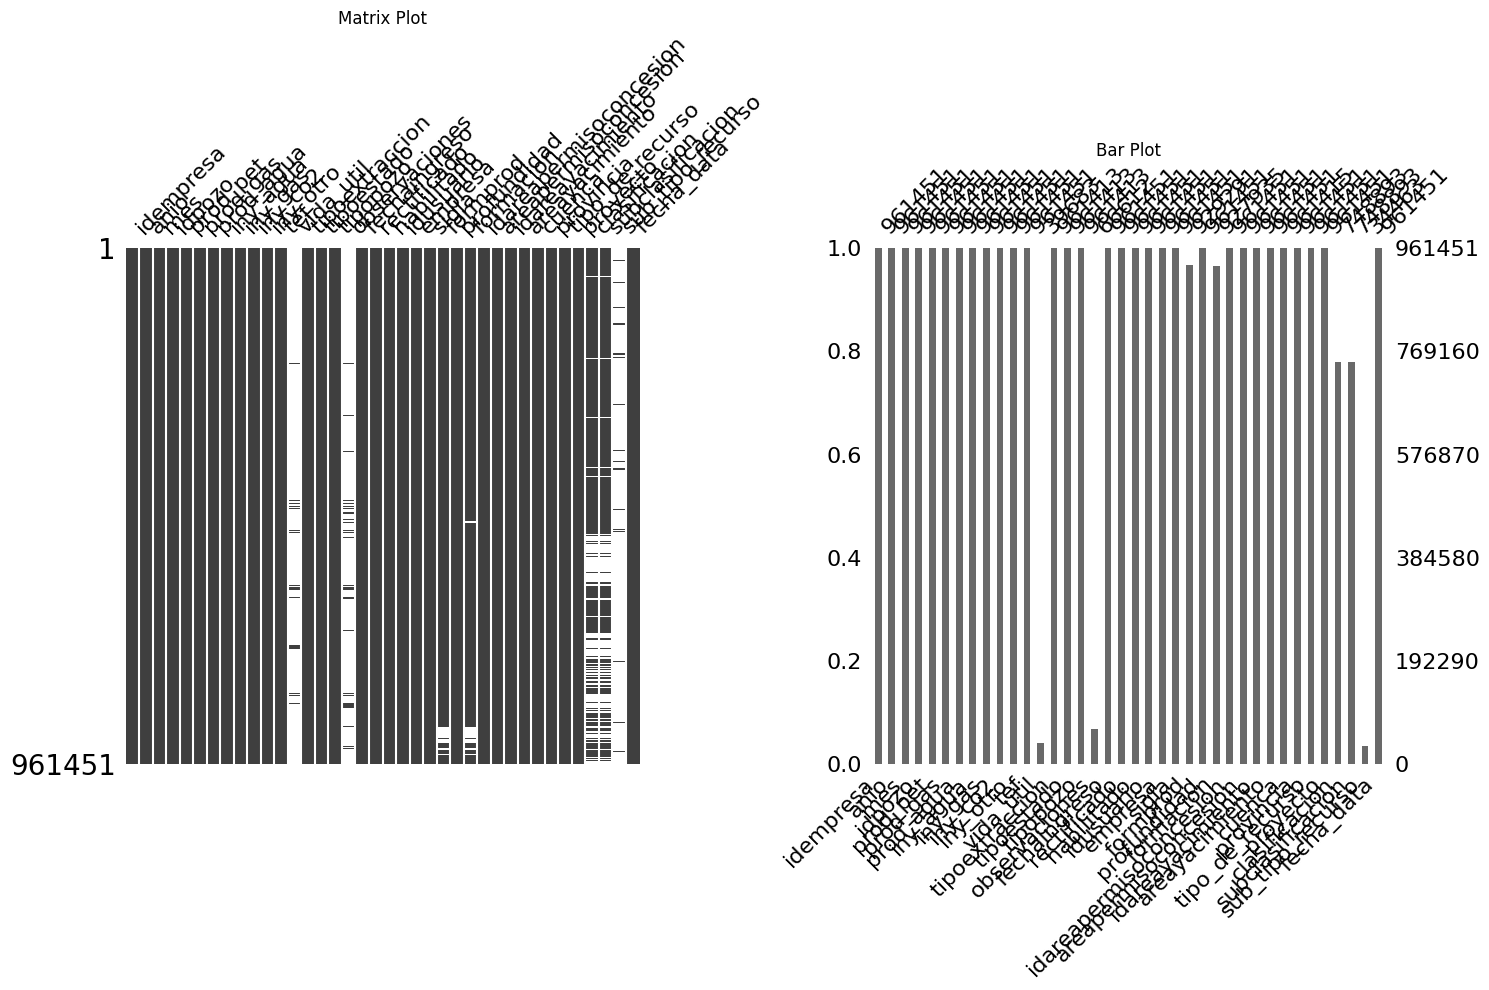

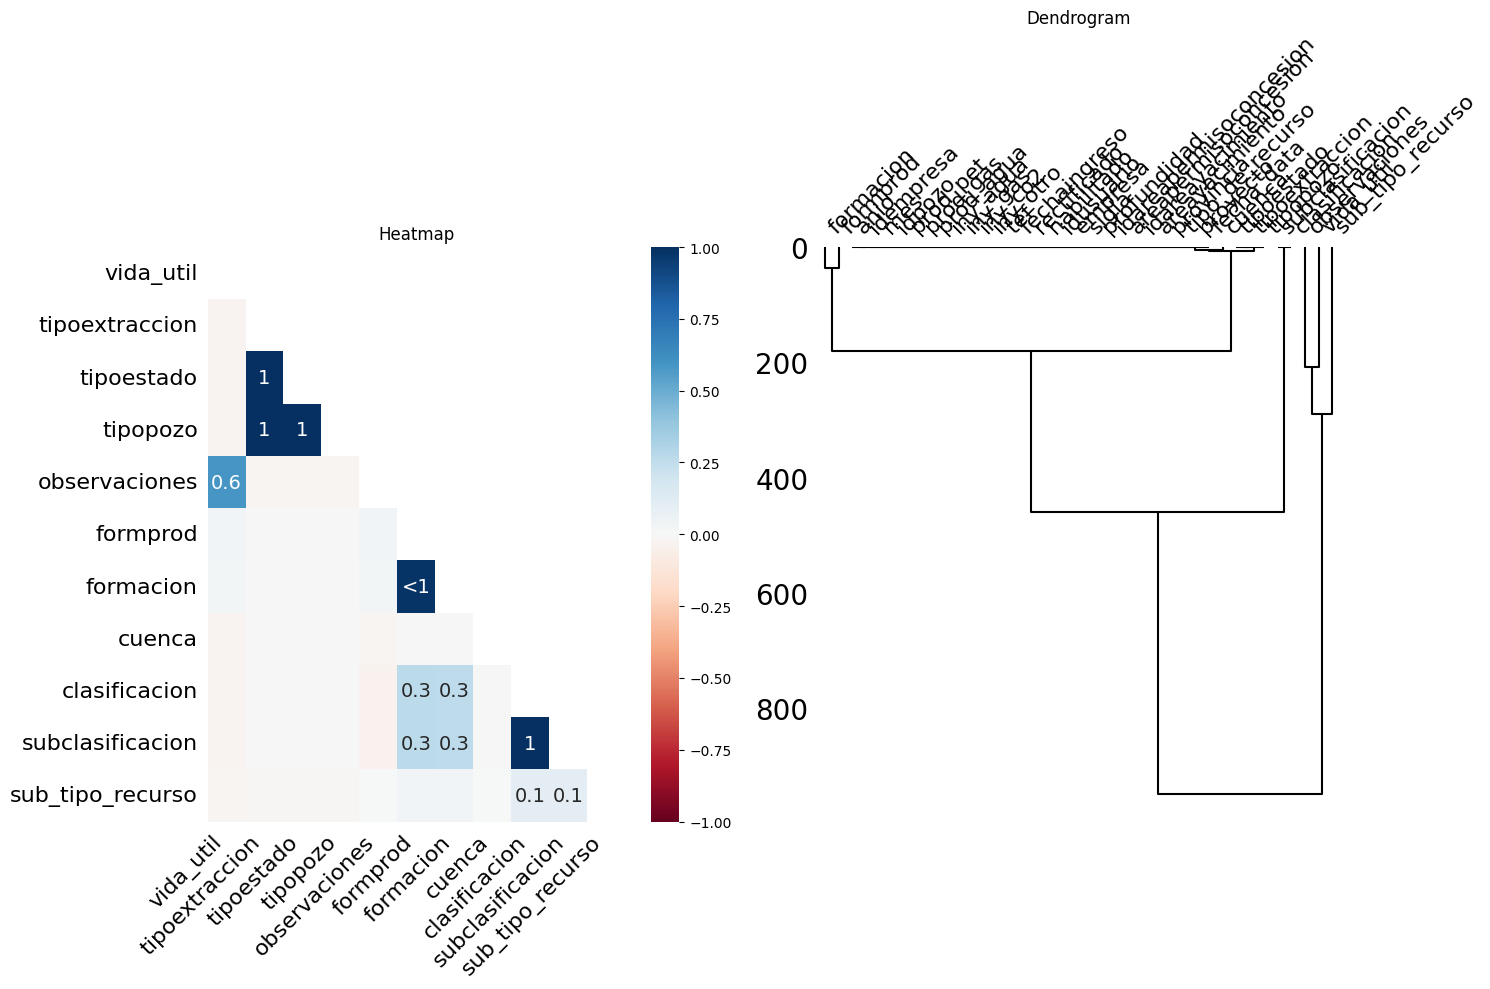

In [40]:
r.visualizar_nulos(prod_gyp_2021)

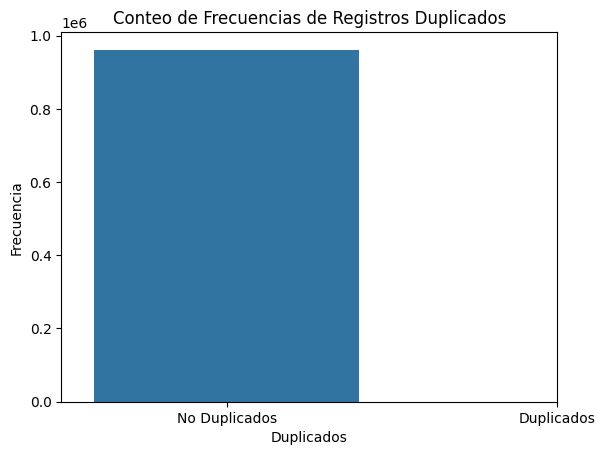

In [41]:
r.hist_duplicados(prod_gyp_2021)

## Produccion de gas y petroleo (2022)

### Informe general

In [42]:
r.informe_dataframe(prod_gyp_2022)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 972353
Columnas: 38

--Numero de datos--
33669674

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 972352
Columnas: ['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data']

--Tipo de columnas--
idempresa                  object
anio                        int64
mes                         int64
idpozo                      int64
prod_pet                  float64
prod_gas            

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [43]:
r.verificar_tipo_datos(prod_gyp_2022)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%   nulos
0                idempresa                   [<class 'str'>]      100.00     0.00       0
1                     anio                   [<class 'int'>]      100.00     0.00       0
2                      mes                   [<class 'int'>]      100.00     0.00       0
3                   idpozo                   [<class 'int'>]      100.00     0.00       0
4                 prod_pet                 [<class 'float'>]      100.00     0.00       0
5                 prod_gas                 [<class 'float'>]      100.00     0.00       0
6                prod_agua                 [<class 'float'>]      100.00     0.00       0
7                 iny_agua                 [<class 'float'>]      100.00     0.00       0
8                  iny_gas                 [<class 'float'>]      100.00     0.00       0
9                  iny_co2                 [<class 'float'>]      100.00     0.00       0
10                iny_otro                 [<class 'float'>]      100.00     0.00       0
11                     tef                 [<class 'float'>]      100.00     0.00       0
12               vida_util                 [<class 'float'>]        2.87    97.13  944440
13          tipoextraccion  [<class 'str'>, <class 'float'>]       99.99     0.01     136
14              tipoestado  [<class 'str'>, <class 'float'>]       99.99     0.01     136
15                tipopozo  [<class 'str'>, <class 'float'>]       99.99     0.01     136
16           observaciones  [<class 'str'>, <class 'float'>]        6.37    93.63  910409
17            fechaingreso                   [<class 'str'>]      100.00     0.00       0
18             rectificado                   [<class 'str'>]      100.00     0.00       0
19              habilitado                   [<class 'str'>]      100.00     0.00       0
20               idusuario                   [<class 'int'>]      100.00     0.00       0
21                 empresa                   [<class 'str'>]      100.00     0.00       0
22                   sigla                   [<class 'str'>]      100.00     0.00       0
23                formprod  [<class 'str'>, <class 'float'>]       96.69     3.31   32160
24             profundidad                 [<class 'float'>]      100.00     0.00       0
25               formacion  [<class 'str'>, <class 'float'>]       96.55     3.45   33516
26  idareapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
27    areapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
28        idareayacimiento                   [<class 'str'>]      100.00     0.00       0
29          areayacimiento                   [<class 'str'>]      100.00     0.00       0
30                  cuenca  [<class 'str'>, <class 'float'>]      100.00     0.00      36
31               provincia                   [<class 'str'>]      100.00     0.00       0
32         tipo_de_recurso                   [<class 'str'>]      100.00     0.00       0
33                proyecto                   [<class 'str'>]      100.00     0.00       0
34           clasificacion  [<class 'str'>, <class 'float'>]       78.13    21.87  212646
35        subclasificacion  [<class 'str'>, <class 'float'>]       78.13    21.87  212646
36        sub_tipo_recurso  [<class 'float'>, <class 'str'>]        4.00    96.00  933479
37              fecha_data                   [<class 'str'>]      100.00     0.00       0

### Informe particular

In [44]:
for columna in prod_gyp_2022:
  r.informe_columna(prod_gyp_2022, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE idempresa:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
60

--Valores unicos en la columna (Primeros 5 valores)--
['Z001' 'YPF' 'VST' 'VNO' 'VIS']

--Moda de la columna especificada--
Valor modal -----> YPF
Frecuencia acumulada ------> 468230

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 idempresa
YPF     468230
PAL      96946
SINO     60158
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE anio:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [2022]  -----> Desde 2022  Hasta 2022

--Estadisticos Principales de la columna--
Media: 2022.0
Desviacion Estandar: 0.0
Primer cuartil: 2022.0
Mediana: 20

### Gráficos

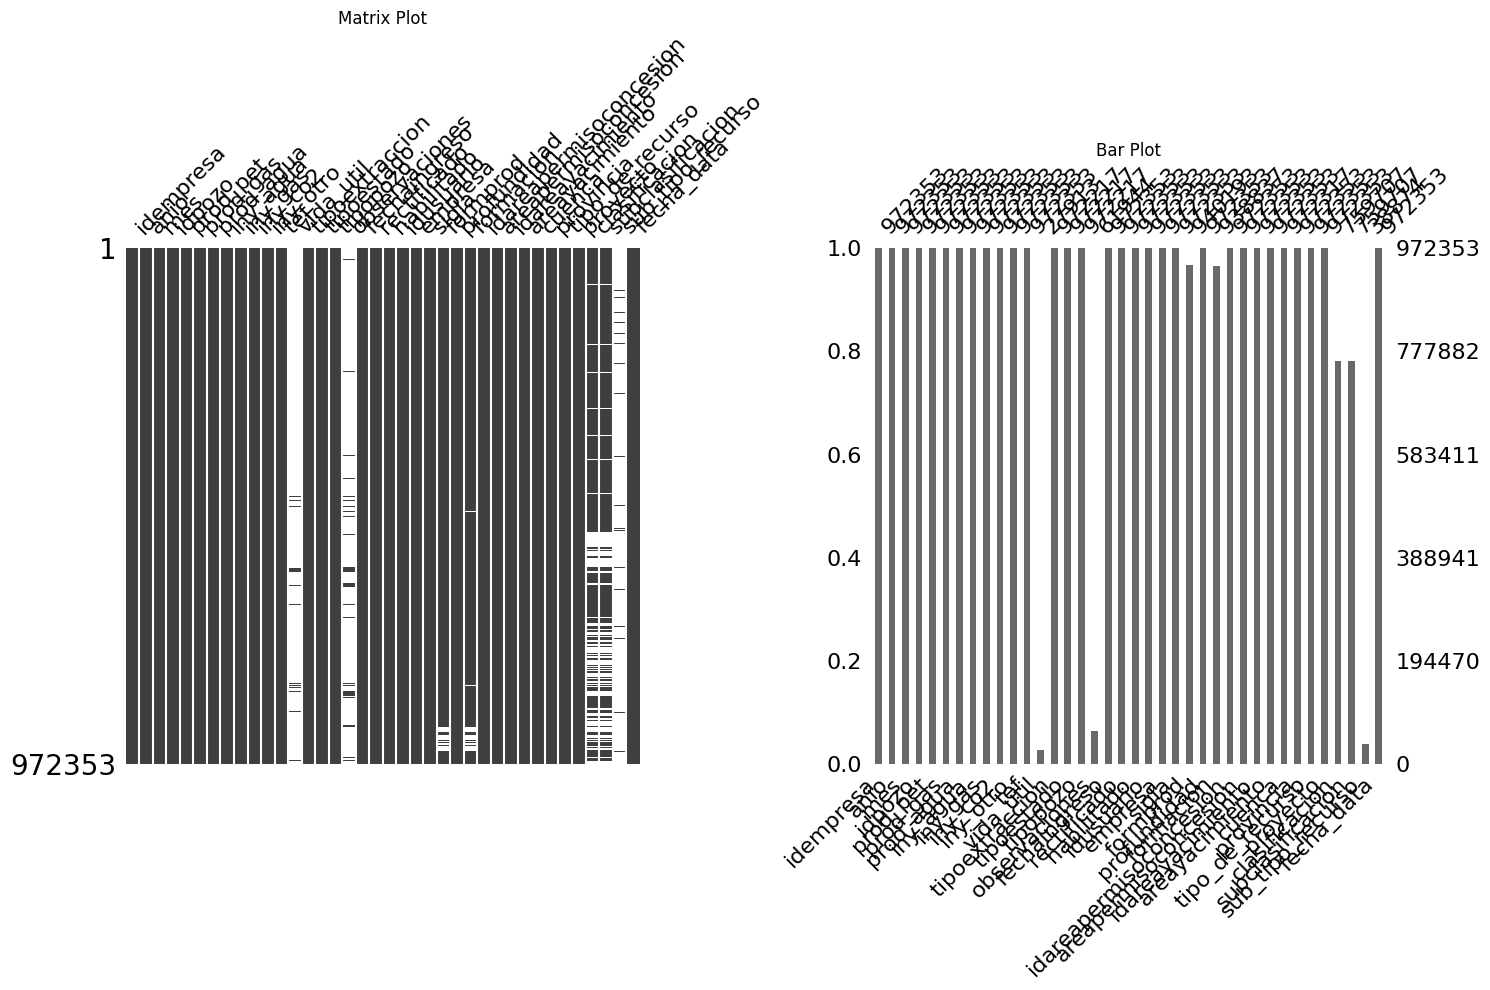

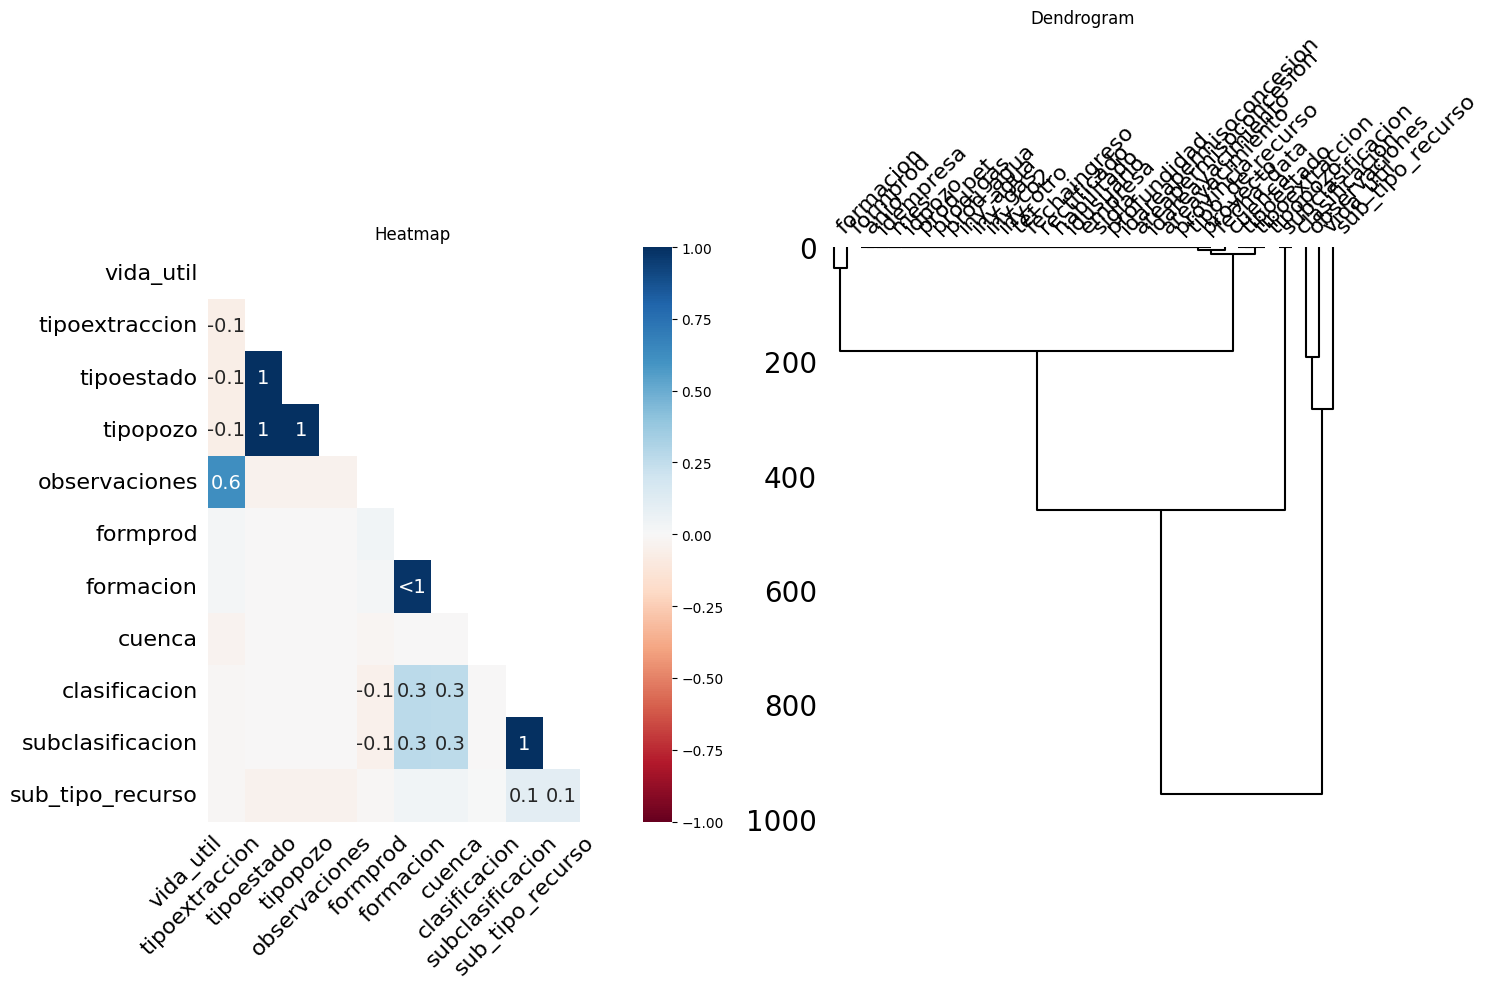

In [45]:
r.visualizar_nulos(prod_gyp_2022)

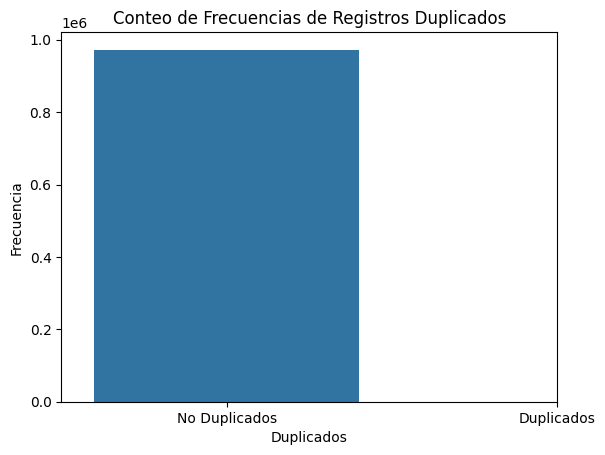

In [46]:
r.hist_duplicados(prod_gyp_2022)

## Produccion de gas y petroleo (2023)

### Informe general

In [47]:
r.informe_dataframe(prod_gyp_2023)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 974958
Columnas: 38

--Numero de datos--
33785463

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 974957
Columnas: ['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data']

--Tipo de columnas--
idempresa                  object
anio                        int64
mes                         int64
idpozo                      int64
prod_pet                  float64
prod_gas            

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [48]:
r.verificar_tipo_datos(prod_gyp_2023)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%   nulos
0                idempresa                   [<class 'str'>]      100.00     0.00       0
1                     anio                   [<class 'int'>]      100.00     0.00       0
2                      mes                   [<class 'int'>]      100.00     0.00       0
3                   idpozo                   [<class 'int'>]      100.00     0.00       0
4                 prod_pet                 [<class 'float'>]      100.00     0.00       0
5                 prod_gas                 [<class 'float'>]      100.00     0.00       0
6                prod_agua                 [<class 'float'>]      100.00     0.00       0
7                 iny_agua                 [<class 'float'>]      100.00     0.00       0
8                  iny_gas                 [<class 'float'>]      100.00     0.00       0
9                  iny_co2                 [<class 'float'>]      100.00     0.00       0
10                iny_otro                 [<class 'float'>]      100.00     0.00       0
11                     tef                 [<class 'float'>]      100.00     0.00       0
12               vida_util                 [<class 'float'>]        2.53    97.47  950318
13          tipoextraccion  [<class 'str'>, <class 'float'>]      100.00     0.00      41
14              tipoestado  [<class 'str'>, <class 'float'>]      100.00     0.00      41
15                tipopozo  [<class 'str'>, <class 'float'>]      100.00     0.00      41
16           observaciones  [<class 'str'>, <class 'float'>]        6.93    93.07  907381
17            fechaingreso                   [<class 'str'>]      100.00     0.00       0
18             rectificado                   [<class 'str'>]      100.00     0.00       0
19              habilitado                   [<class 'str'>]      100.00     0.00       0
20               idusuario                   [<class 'int'>]      100.00     0.00       0
21                 empresa                   [<class 'str'>]      100.00     0.00       0
22                   sigla                   [<class 'str'>]      100.00     0.00       0
23                formprod  [<class 'str'>, <class 'float'>]       96.70     3.30   32160
24             profundidad                 [<class 'float'>]      100.00     0.00       0
25               formacion  [<class 'str'>, <class 'float'>]       96.56     3.44   33516
26  idareapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
27    areapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
28        idareayacimiento                   [<class 'str'>]      100.00     0.00       0
29          areayacimiento                   [<class 'str'>]      100.00     0.00       0
30                  cuenca  [<class 'str'>, <class 'float'>]      100.00     0.00      36
31               provincia                   [<class 'str'>]      100.00     0.00       0
32         tipo_de_recurso                   [<class 'str'>]      100.00     0.00       0
33                proyecto                   [<class 'str'>]      100.00     0.00       0
34           clasificacion  [<class 'str'>, <class 'float'>]       79.10    20.90  203804
35        subclasificacion  [<class 'str'>, <class 'float'>]       79.10    20.90  203804
36        sub_tipo_recurso  [<class 'float'>, <class 'str'>]        4.43    95.57  931799
37              fecha_data                   [<class 'str'>]      100.00     0.00       0

### Informe particular

In [49]:
for columna in prod_gyp_2023:
  r.informe_columna(prod_gyp_2023, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE idempresa:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
57

--Valores unicos en la columna (Primeros 5 valores)--
['Z001' 'YPF' 'VST' 'VNO' 'TPT']

--Moda de la columna especificada--
Valor modal -----> YPF
Frecuencia acumulada ------> 472041

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 idempresa
YPF    472041
PAL     99276
CG1     80537
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE anio:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [2023]  -----> Desde 2023  Hasta 2023

--Estadisticos Principales de la columna--
Media: 2023.0
Desviacion Estandar: 0.0
Primer cuartil: 2023.0
Mediana: 2023.

### Gráficos

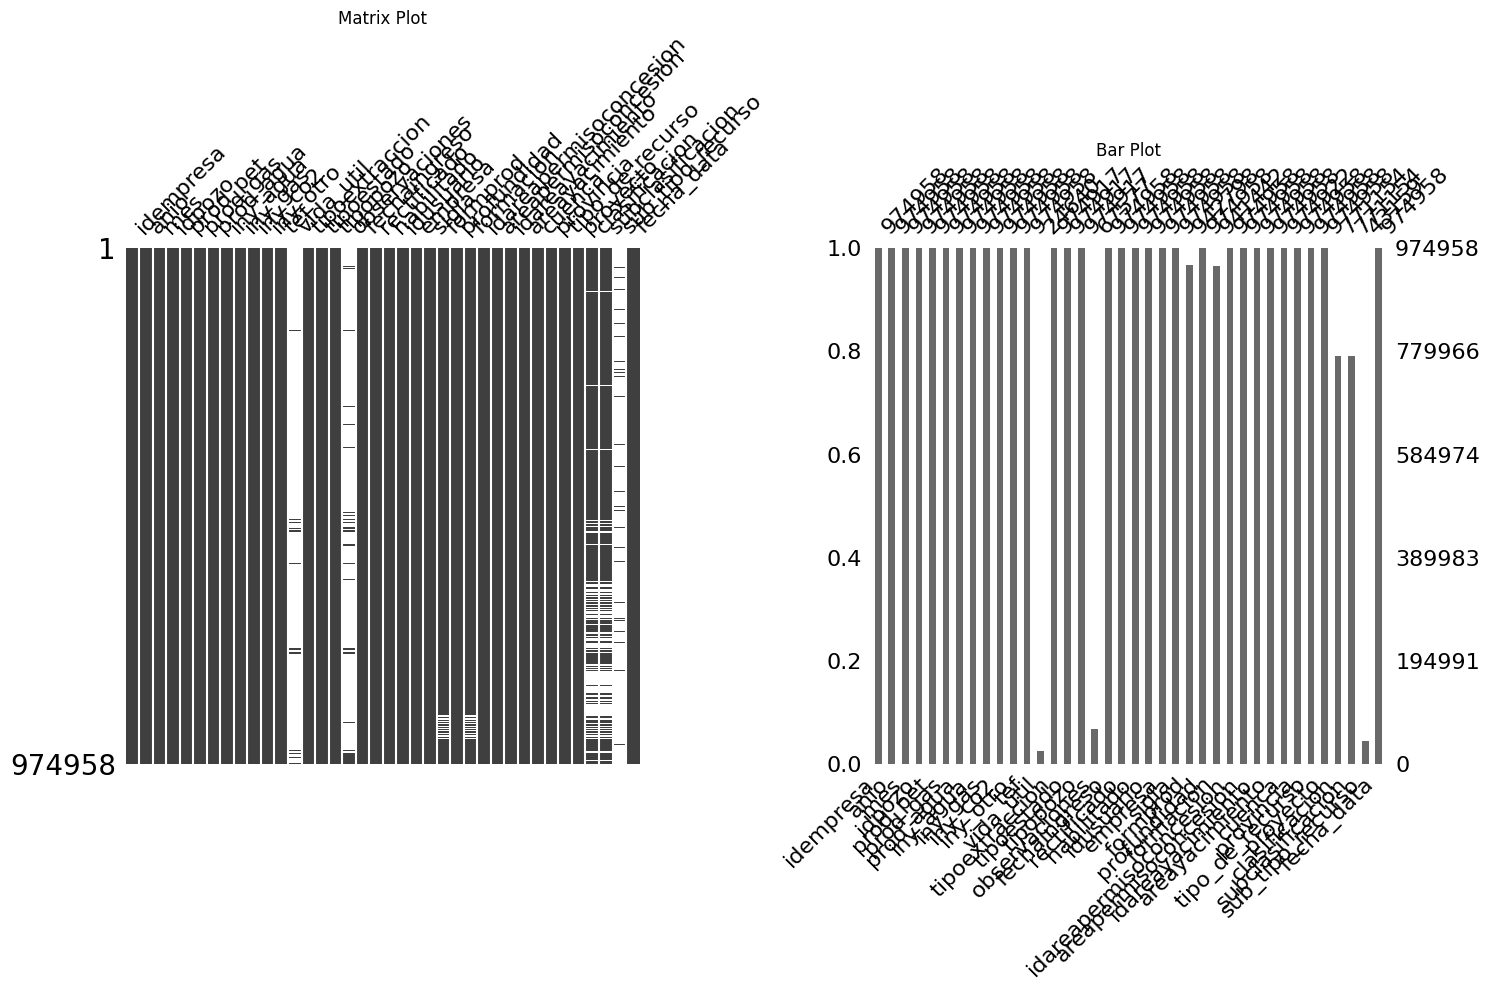

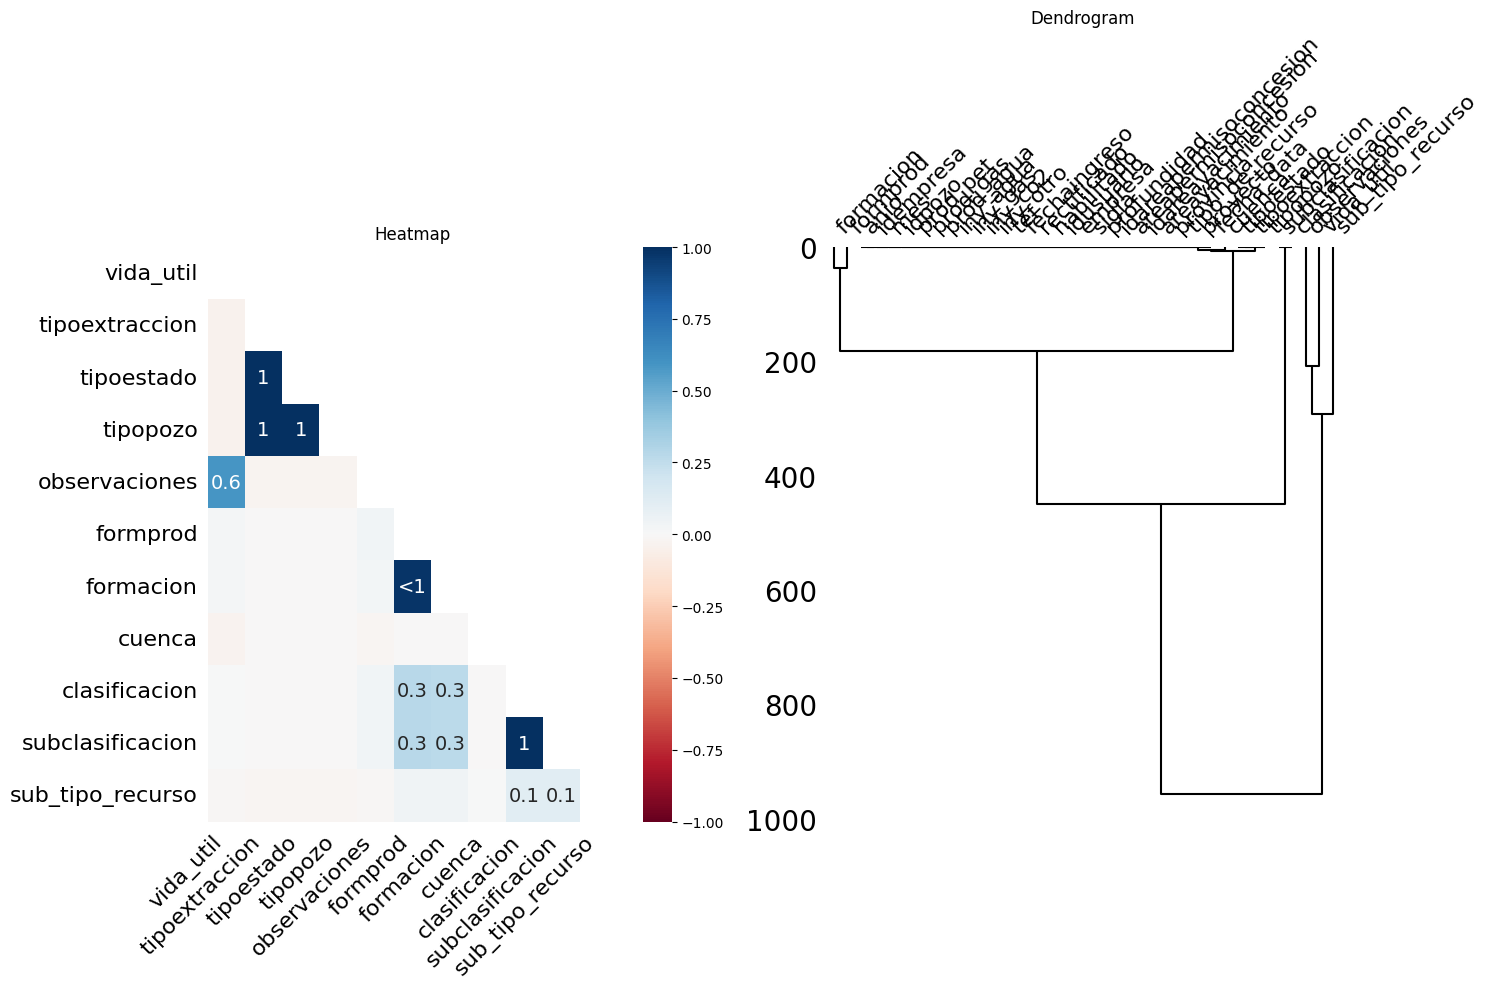

In [50]:
r.visualizar_nulos(prod_gyp_2023)

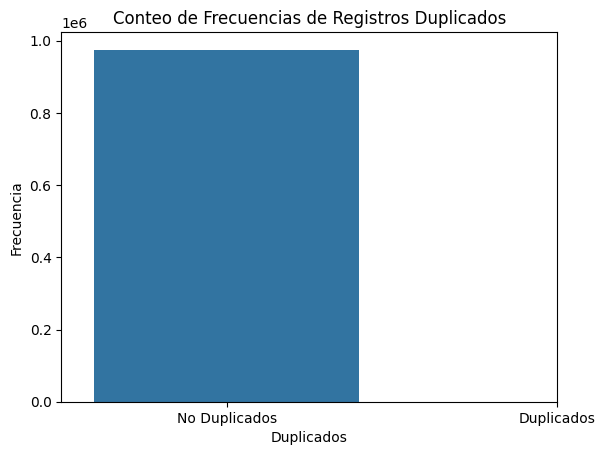

In [51]:
r.hist_duplicados(prod_gyp_2023)

## Produccion de gas y petroleo (2024)

### Informe general

In [52]:
r.informe_dataframe(prod_gyp_2024)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 409352
Columnas: 38

--Numero de datos--
14189243

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 409351
Columnas: ['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data']

--Tipo de columnas--
idempresa                  object
anio                        int64
mes                         int64
idpozo                      int64
prod_pet                  float64
prod_gas            

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [53]:
r.verificar_tipo_datos(prod_gyp_2024)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%   nulos
0                idempresa                   [<class 'str'>]      100.00     0.00       0
1                     anio                   [<class 'int'>]      100.00     0.00       0
2                      mes                   [<class 'int'>]      100.00     0.00       0
3                   idpozo                   [<class 'int'>]      100.00     0.00       0
4                 prod_pet                 [<class 'float'>]      100.00     0.00       0
5                 prod_gas                 [<class 'float'>]      100.00     0.00       0
6                prod_agua                 [<class 'float'>]      100.00     0.00       0
7                 iny_agua                 [<class 'float'>]      100.00     0.00       0
8                  iny_gas                 [<class 'float'>]      100.00     0.00       0
9                  iny_co2                 [<class 'float'>]      100.00     0.00       0
10                iny_otro                 [<class 'float'>]      100.00     0.00       0
11                     tef                 [<class 'float'>]      100.00     0.00       0
12               vida_util                 [<class 'float'>]        2.42    97.58  399442
13          tipoextraccion  [<class 'str'>, <class 'float'>]      100.00     0.00      19
14              tipoestado  [<class 'str'>, <class 'float'>]      100.00     0.00      19
15                tipopozo  [<class 'str'>, <class 'float'>]      100.00     0.00      19
16           observaciones  [<class 'str'>, <class 'float'>]        7.21    92.79  379840
17            fechaingreso                   [<class 'str'>]      100.00     0.00       0
18             rectificado                   [<class 'str'>]      100.00     0.00       0
19              habilitado                   [<class 'str'>]      100.00     0.00       0
20               idusuario                   [<class 'int'>]      100.00     0.00       0
21                 empresa                   [<class 'str'>]      100.00     0.00       0
22                   sigla                   [<class 'str'>]      100.00     0.00       0
23                formprod  [<class 'str'>, <class 'float'>]       96.73     3.27   13400
24             profundidad                 [<class 'float'>]      100.00     0.00       0
25               formacion  [<class 'str'>, <class 'float'>]       96.59     3.41   13973
26  idareapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
27    areapermisoconcesion                   [<class 'str'>]      100.00     0.00       0
28        idareayacimiento                   [<class 'str'>]      100.00     0.00       0
29          areayacimiento                   [<class 'str'>]      100.00     0.00       0
30                  cuenca  [<class 'str'>, <class 'float'>]      100.00     0.00      15
31               provincia                   [<class 'str'>]      100.00     0.00       0
32         tipo_de_recurso                   [<class 'str'>]      100.00     0.00       0
33                proyecto                   [<class 'str'>]      100.00     0.00       0
34           clasificacion  [<class 'str'>, <class 'float'>]       79.28    20.72   84804
35        subclasificacion  [<class 'str'>, <class 'float'>]       79.28    20.72   84804
36        sub_tipo_recurso  [<class 'float'>, <class 'str'>]        4.78    95.22  389798
37              fecha_data                   [<class 'str'>]      100.00     0.00       0

### Informe particular

In [54]:
for columna in prod_gyp_2024:
  r.informe_columna(prod_gyp_2024, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE idempresa:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
56

--Valores unicos en la columna (Primeros 5 valores)--
['Z001' 'YPF' 'VST' 'VNO' 'TPT']

--Moda de la columna especificada--
Valor modal -----> YPF
Frecuencia acumulada ------> 197705

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 idempresa
YPF    197705
PAL     42142
CG1     33688
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE anio:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [2024]  -----> Desde 2024  Hasta 2024

--Estadisticos Principales de la columna--
Media: 2024.0
Desviacion Estandar: 0.0
Primer cuartil: 2024.0
Mediana: 2024.

### Gráficos

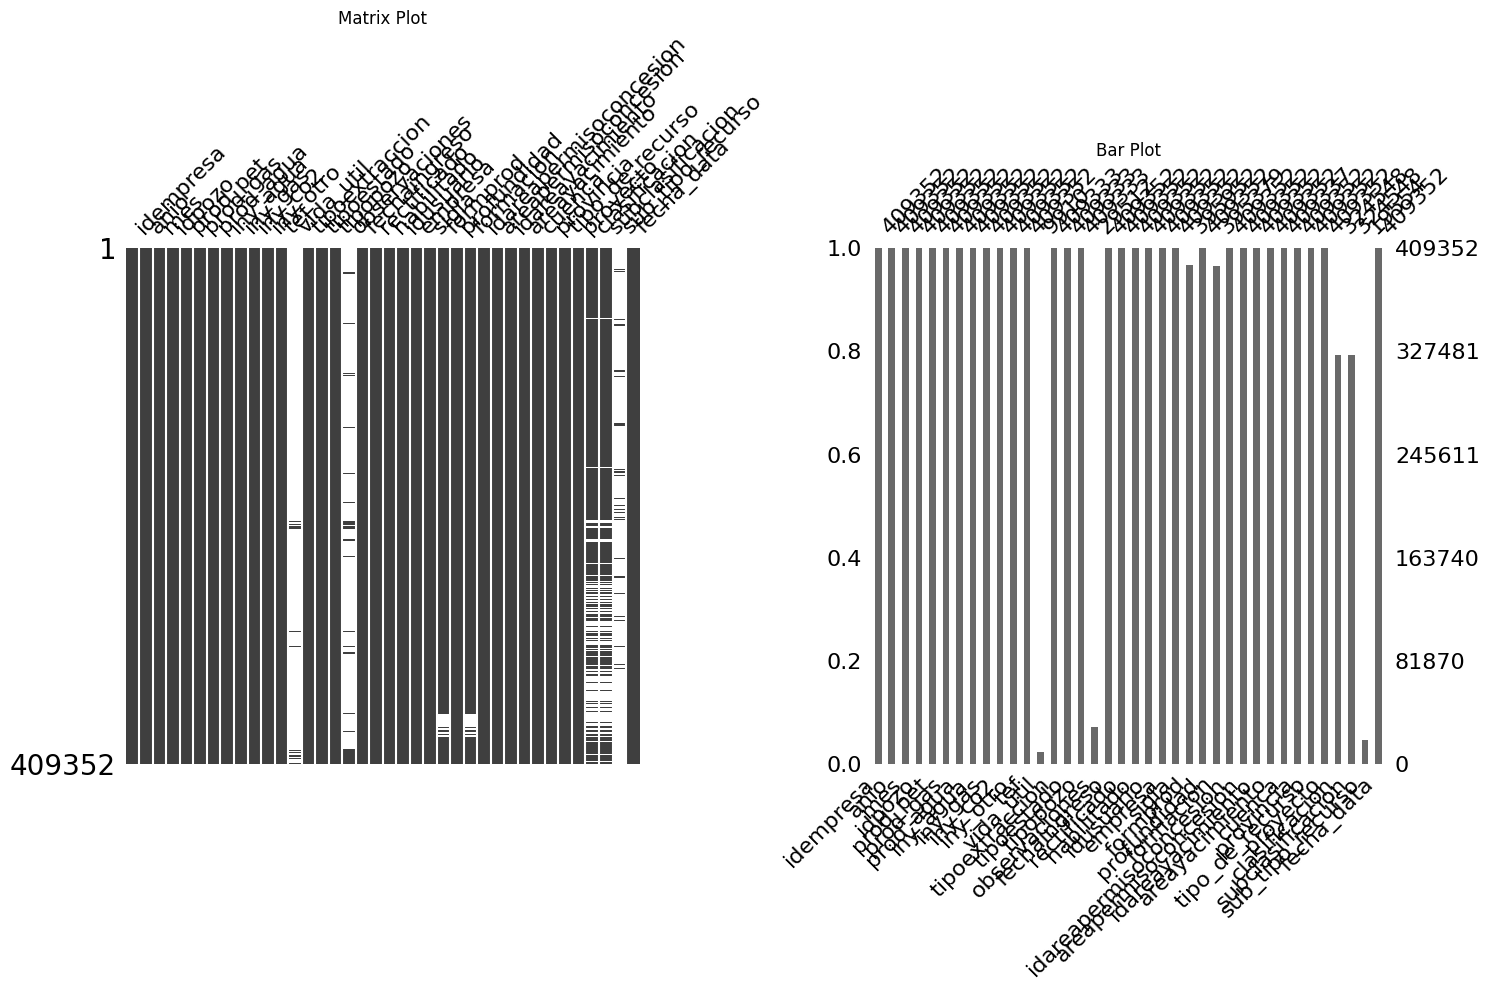

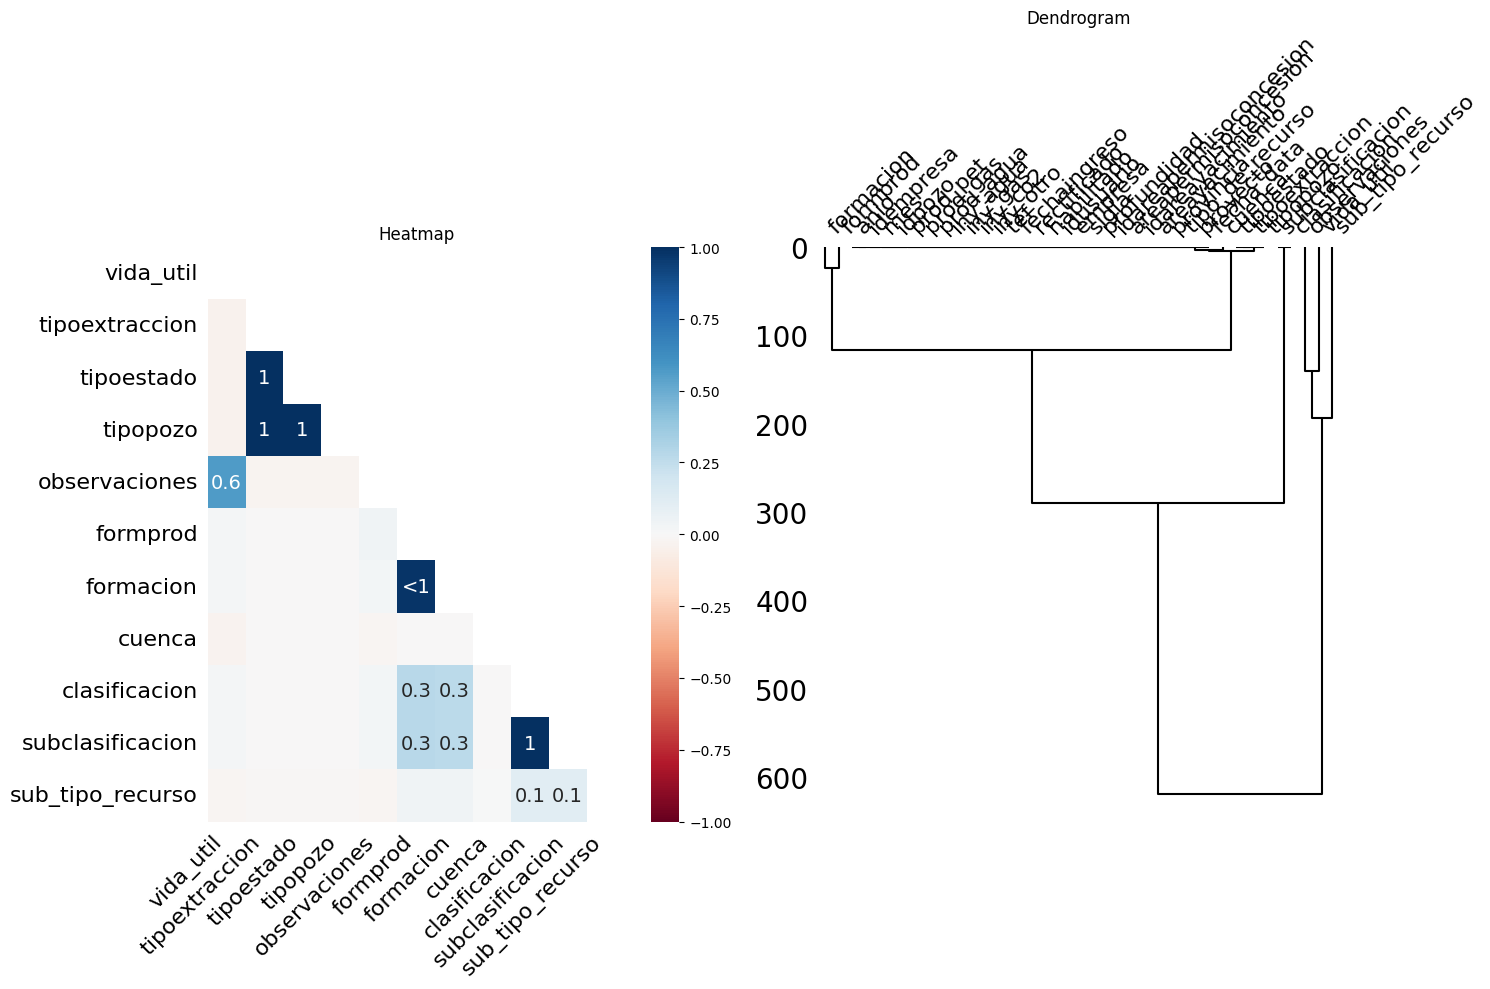

In [55]:
r.visualizar_nulos(prod_gyp_2024)

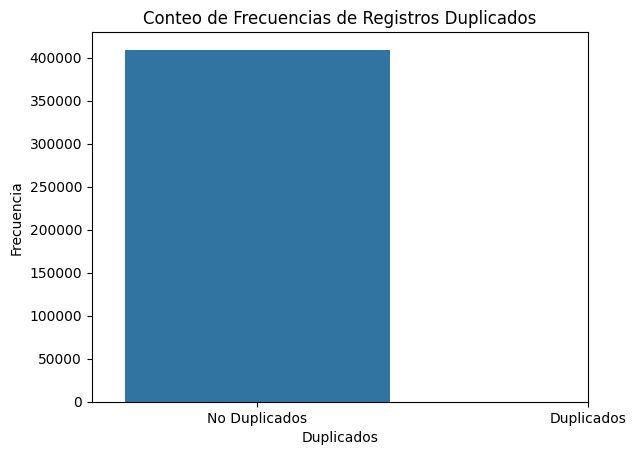

In [56]:
r.hist_duplicados(prod_gyp_2024)

## Precio Mundial del petroleo (desde 1970)

### Informe general

In [57]:
r.informe_dataframe(precio_mundial)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 264
Columnas: 60

--Numero de datos--
11762

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 263
Columnas: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1966', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Unnamed: 68']

--Tipo de columnas--
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1966              float64
1970              float64
1971              float64
1972              float64
1

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [58]:
r.verificar_tipo_datos(precio_mundial)

nombre_campo         tipo_datos  no_nulos_%  nulos_%  nulos
0     Country Name    [<class 'str'>]      100.00     0.00      0
1     Country Code    [<class 'str'>]      100.00     0.00      0
2   Indicator Name    [<class 'str'>]      100.00     0.00      0
3   Indicator Code    [<class 'str'>]      100.00     0.00      0
4             1966  [<class 'float'>]        0.00   100.00    264
5             1970  [<class 'float'>]       28.79    71.21    188
6             1971  [<class 'float'>]       48.11    51.89    137
7             1972  [<class 'float'>]       48.48    51.52    136
8             1973  [<class 'float'>]       48.48    51.52    136
9             1974  [<class 'float'>]       48.86    51.14    135
10            1975  [<class 'float'>]       49.62    50.38    133
11            1976  [<class 'float'>]       50.38    49.62    131
12            1977  [<class 'float'>]       50.38    49.62    131
13            1978  [<class 'float'>]       50.38    49.62    131
14            1979  [<class 'float'>]       48.11    51.89    137
15            1980  [<class 'float'>]       70.45    29.55     78
16            1981  [<class 'float'>]       71.21    28.79     76
17            1982  [<class 'float'>]       71.59    28.41     75
18            1983  [<class 'float'>]       71.59    28.41     75
19            1984  [<class 'float'>]       72.35    27.65     73
20            1985  [<class 'float'>]       72.73    27.27     72
21            1986  [<class 'float'>]       73.48    26.52     70
22            1987  [<class 'float'>]       75.76    24.24     64
23            1988  [<class 'float'>]       76.89    23.11     61
24            1989  [<class 'float'>]       76.89    23.11     61
25            1990  [<class 'float'>]       81.82    18.18     48
26            1991  [<class 'float'>]       81.82    18.18     48
27            1992  [<class 'float'>]       82.20    17.80     47
28            1993  [<class 'float'>]       83.33    16.67     44
29            1994  [<class 'float'>]       83.71    16.29     43
30            1995  [<class 'float'>]       86.74    13.26     35
31            1996  [<class 'float'>]       87.12    12.88     34
32            1997  [<class 'float'>]       87.50    12.50     33
33            1998  [<class 'float'>]       87.88    12.12     32
34            1999  [<class 'float'>]       87.50    12.50     33
35            2000  [<class 'float'>]       87.88    12.12     32
36            2001  [<class 'float'>]       88.26    11.74     31
37            2002  [<class 'float'>]       89.77    10.23     27
38            2003  [<class 'float'>]       90.15     9.85     26
39            2004  [<class 'float'>]       90.15     9.85     26
40            2005  [<class 'float'>]       90.91     9.09     24
41            2006  [<class 'float'>]       91.29     8.71     23
42            2007  [<class 'float'>]       90.91     9.09     24
43            2008  [<class 'float'>]       91.67     8.33     22
44            2009  [<class 'float'>]       91.29     8.71     23
45            2010  [<class 'float'>]       91.67     8.33     22
46            2011  [<class 'float'>]       91.67     8.33     22
47            2012  [<class 'float'>]       91.29     8.71     23
48            2013  [<class 'float'>]       92.05     7.95     21
49            2014  [<class 'float'>]       92.05     7.95     21
50            2015  [<class 'float'>]       92.05     7.95     21
51            2016  [<class 'float'>]       91.67     8.33     22
52            2017  [<class 'float'>]       92.05     7.95     21
53            2018  [<class 'float'>]       92.05     7.95     21
54            2019  [<class 'float'>]       91.67     8.33     22
55            2020  [<class 'float'>]       91.29     8.71     23
56            2021  [<class 'float'>]       89.39    10.61     28
57            2022  [<class 'float'>]        0.00   100.00    264
58            2023  [<class 'float'>]        0.00   100.00    264
59     Unnamed: 68  [<class 'float'>]        0

### Informe particular

In [59]:
for columna in precio_mundial:
  r.informe_columna(precio_mundial, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE Country Name:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
264

--Valores unicos en la columna (Primeros 5 valores)--
['Aruba' 'Afganistán' 'Angola' 'Albania' 'Andorra']

--Moda de la columna especificada--
Valor modal -----> Aruba
Frecuencia acumulada ------> 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 Country Name
Aruba                    1
Otros Estados pequeos    1
Malasia                  1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE Country Code:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
264

--Valores unicos en la columna (Primeros 5 valores)--
['ABW' 'AFG' 'AGO' 'A

### Gráficos

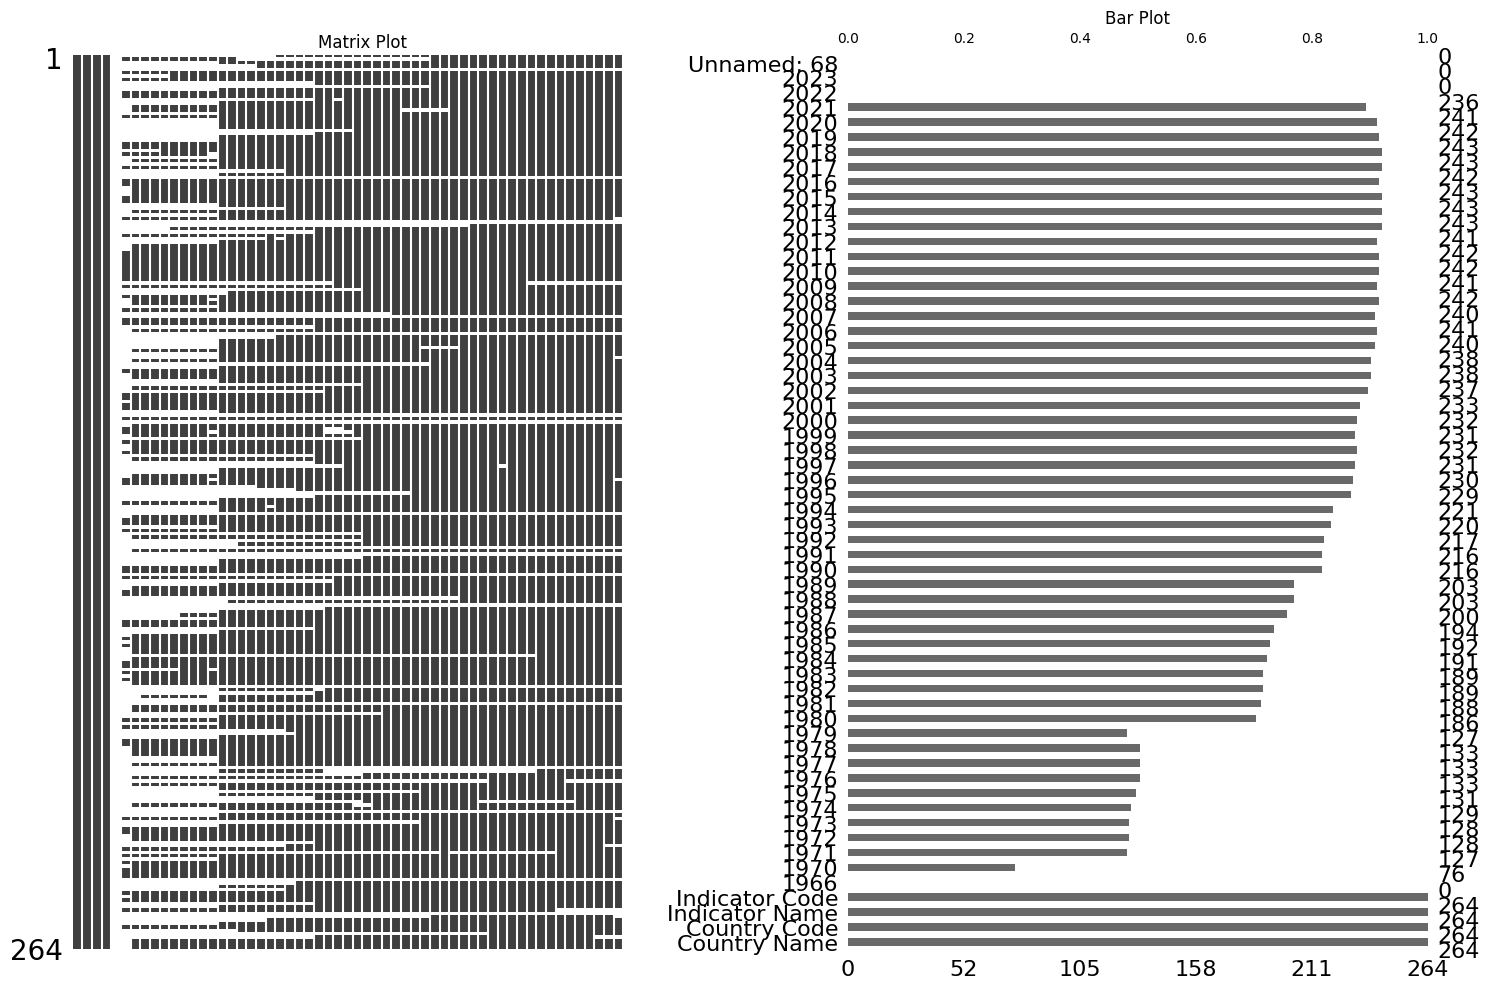

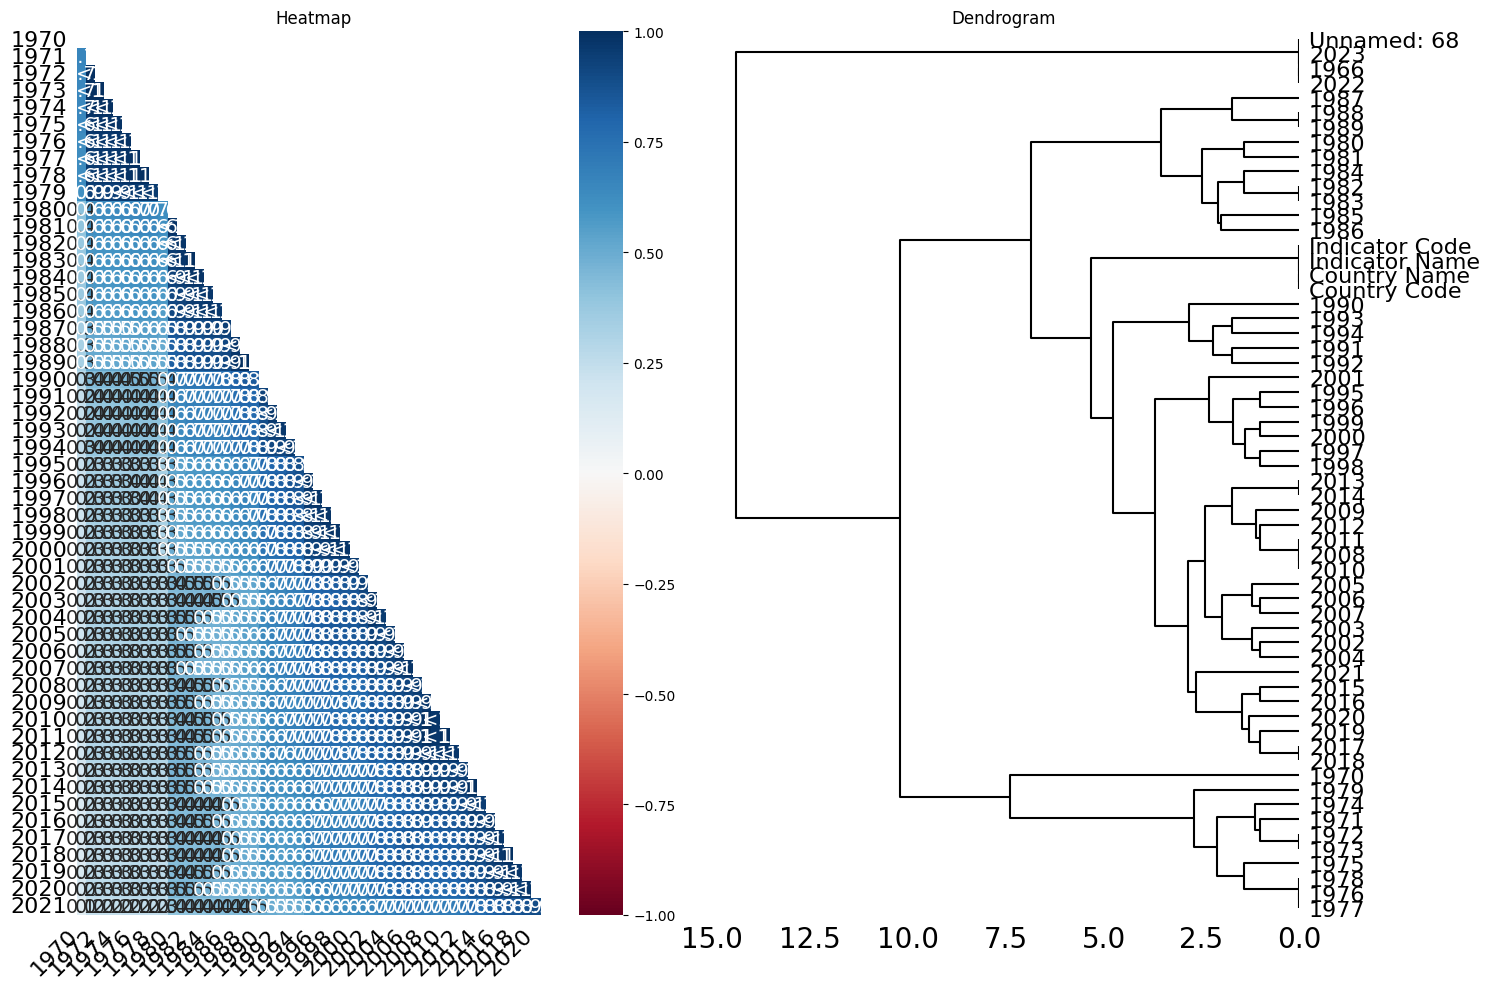

In [60]:
r.visualizar_nulos(precio_mundial)

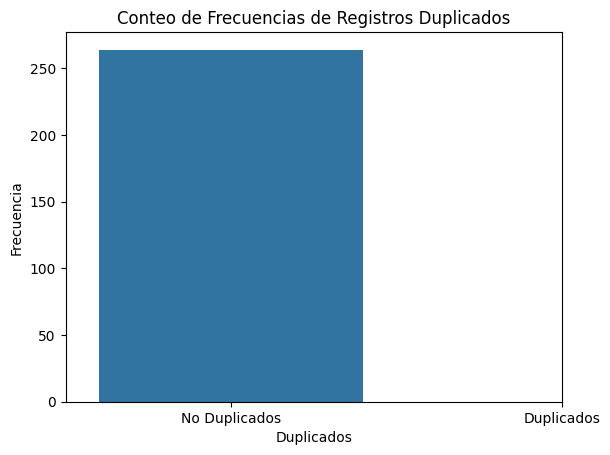

In [61]:
r.hist_duplicados(precio_mundial)

## Petrol Price Worldwide

### Informe general

In [62]:
r.informe_dataframe(ppw)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 181
Columnas: 11

--Numero de datos--
1991

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 180
Columnas: ['S#', 'Country', 'Daily Oil Consumption (Barrels)', 'World Share', 'Yearly Gallons Per Capita', 'Price Per Gallon (USD)', 'Price Per Liter (USD)', 'Price Per Liter (PKR)', 'GDP Per Capita ( USD )', 'Gallons GDP Per Capita Can Buy', 'xTimes Yearly Gallons Per Capita Buy']

--Tipo de columnas--
S#                                        int64
Country                                  object
Daily Oil Consumption (Barrels)          object
World Share                              object
Yearly Gallons Per Capita               float64
Price Per Gallon (USD)                  float64
Price Per Liter (USD)                   float64
Price Per Liter (PKR)                   float64
GDP Per Capita ( USD )                   object
Gallons GDP Per Capita Can Bu

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [63]:
r.verificar_tipo_datos(ppw)

nombre_campo         tipo_datos  no_nulos_%  nulos_%  nulos
0                                     S#    [<class 'int'>]       100.0      0.0      0
1                                Country    [<class 'str'>]       100.0      0.0      0
2        Daily Oil Consumption (Barrels)    [<class 'str'>]       100.0      0.0      0
3                            World Share    [<class 'str'>]       100.0      0.0      0
4              Yearly Gallons Per Capita  [<class 'float'>]       100.0      0.0      0
5                 Price Per Gallon (USD)  [<class 'float'>]       100.0      0.0      0
6                  Price Per Liter (USD)  [<class 'float'>]       100.0      0.0      0
7                  Price Per Liter (PKR)  [<class 'float'>]       100.0      0.0      0
8                 GDP Per Capita ( USD )    [<class 'str'>]       100.0      0.0      0
9         Gallons GDP Per Capita Can Buy    [<class 'str'>]       100.0      0.0      0
10  xTimes Yearly Gallons Per Capita Buy    [<class 'int'>]       100.0      0.0      0

### Informe particular

In [64]:
for columna in ppw:
  r.informe_columna(ppw, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE S#:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [1 2 3 4 5]  -----> Desde 1  Hasta 181

--Estadisticos Principales de la columna--
Media: 91.0
Desviacion Estandar: 52.39
Primer cuartil: 46.0
Mediana: 91.0
Tercer cuartil: 136.0

--Valores extremos--
Valor maximo: 181
Valor minimo: 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 S#
1      1
115    1
117    1
Name: count, dtype: int64

--Valor maximo y minimo--
Maximo: 181
Minimo: 1

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE Country:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
181

--Valores unicos en la columna (Primeros 5 valores)--
['United States' 'China' 'In

### Gráficos

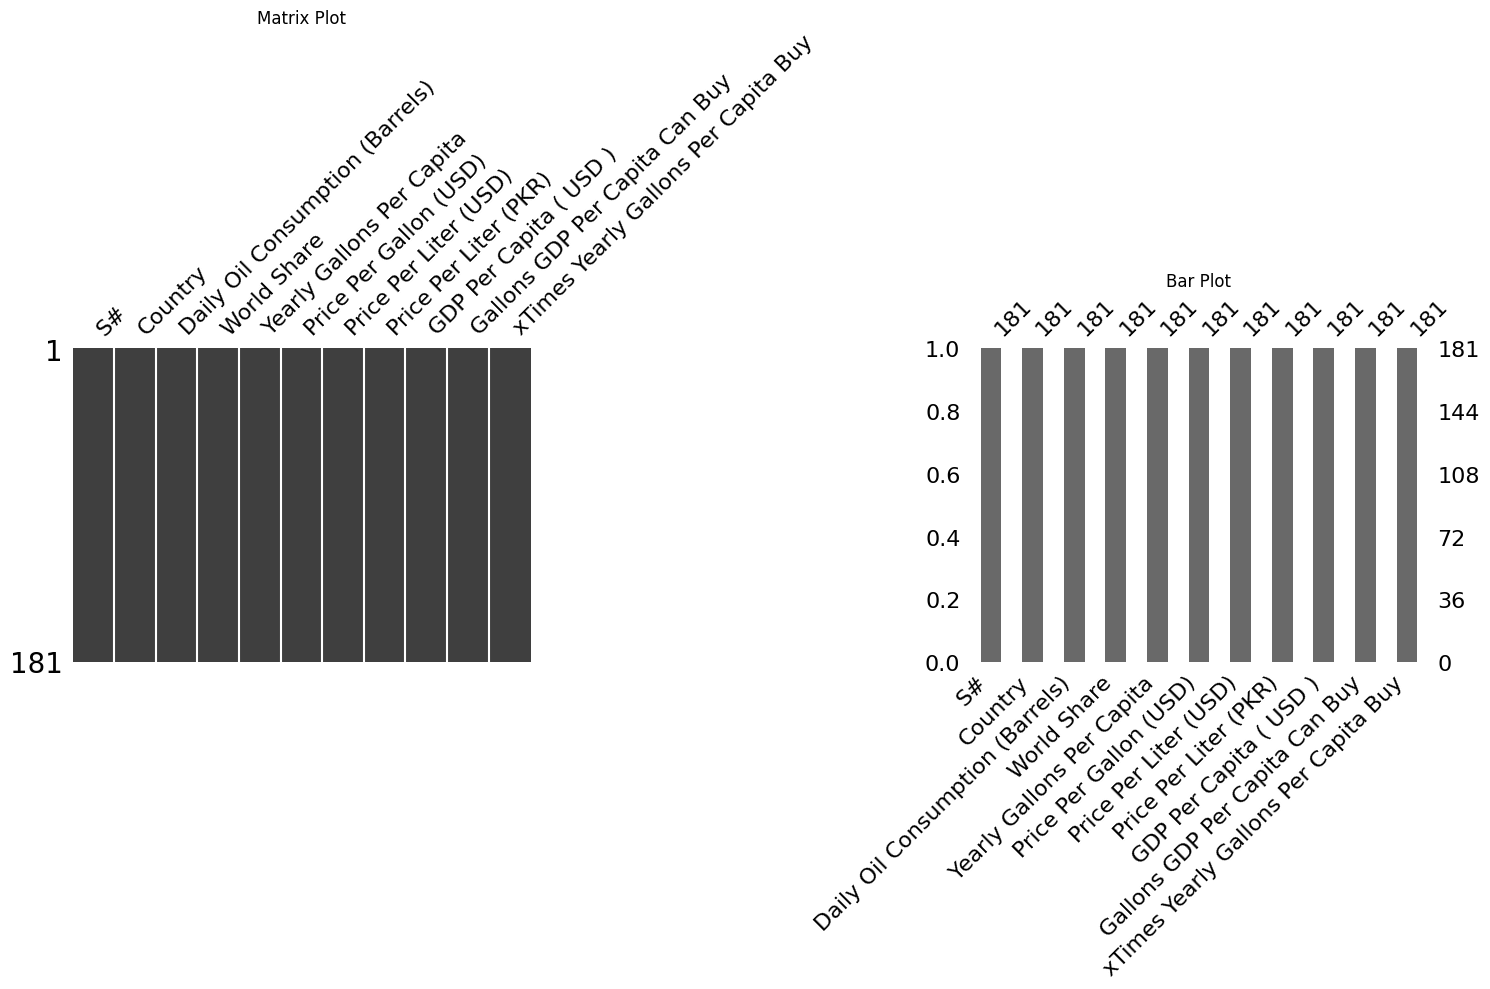

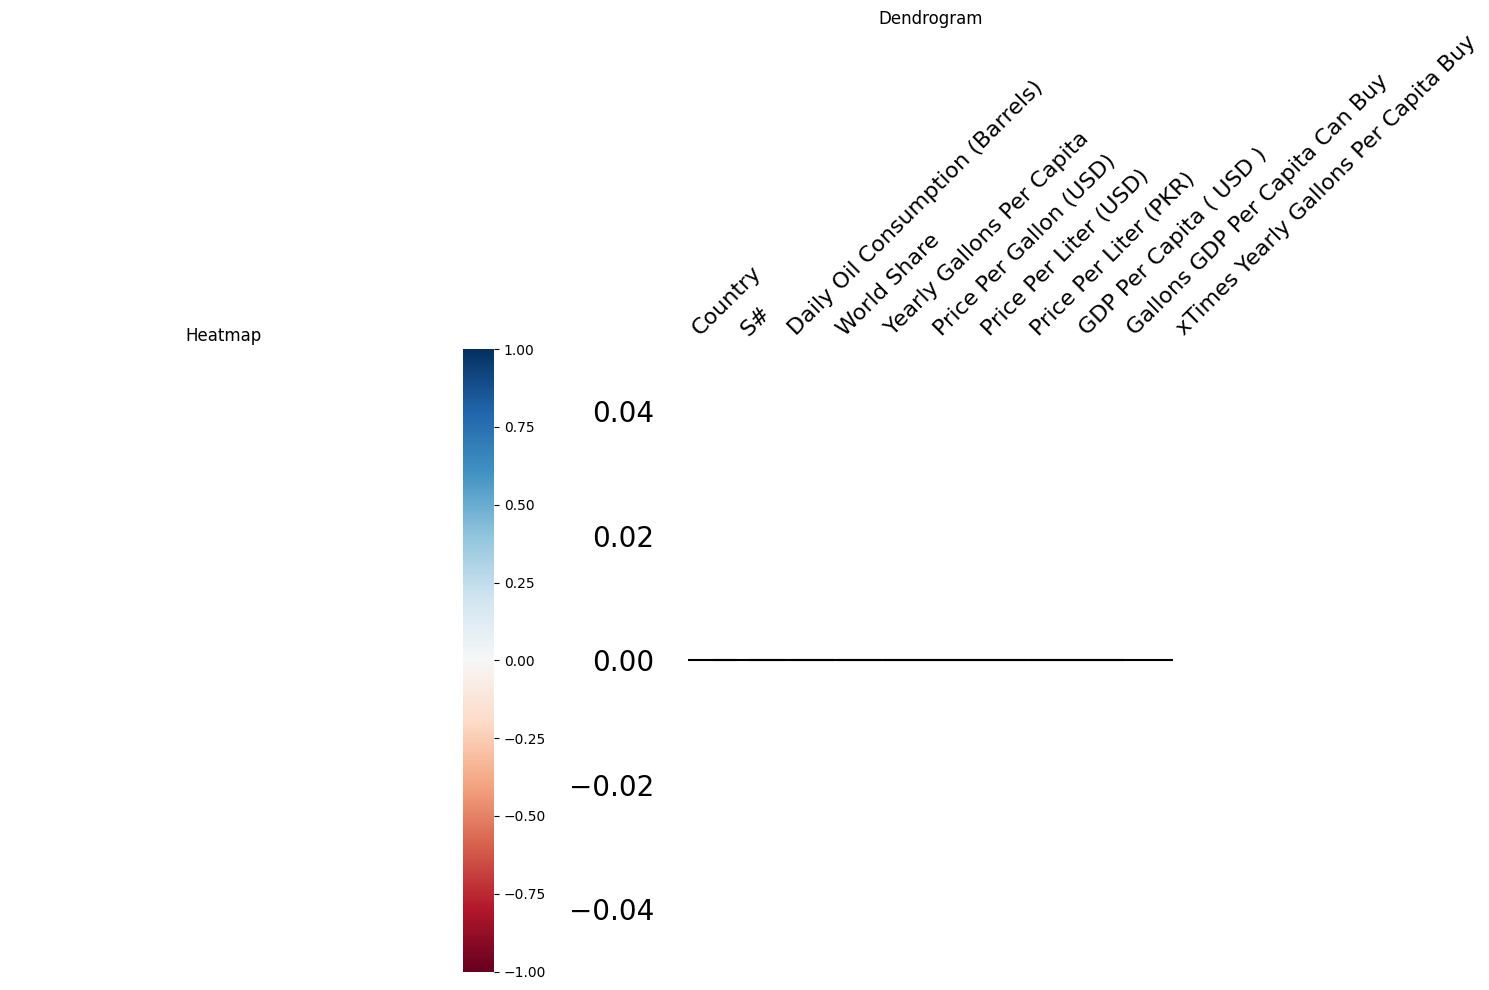

In [65]:
r.visualizar_nulos(ppw)

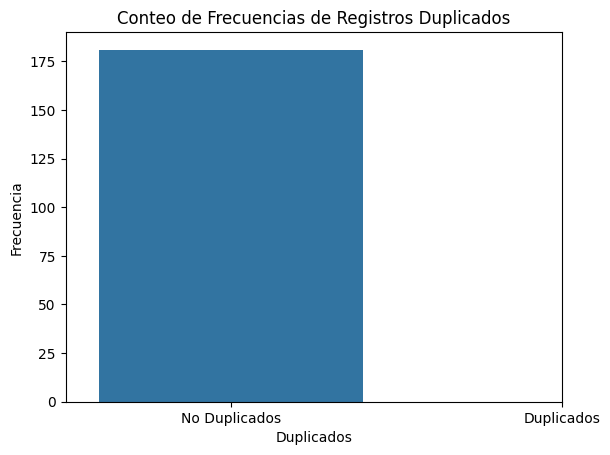

In [66]:
r.hist_duplicados(ppw)

## Produccion petroleras ARG (2009 - 2018)

### Informe general

In [67]:
r.informe_dataframe(prod_p_09_a_18)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 1187
Columnas: 14

--Numero de datos--
827

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 1186
Columnas: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

--Tipo de columnas--
Unnamed: 0     object
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
Unnamed: 10    object
Unnamed: 11    object
Unnamed: 12    object
Unnamed: 13    object
dtype: object
--Cantidad de registros duplicados--
1117



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [68]:
r.verificar_tipo_datos(prod_p_09_a_18)

nombre_campo                        tipo_datos  no_nulos_%  nulos_%  nulos
0    Unnamed: 0  [<class 'str'>, <class 'float'>]        5.81    94.19   1118
1    Unnamed: 1  [<class 'str'>, <class 'float'>]        5.48    94.52   1122
2    Unnamed: 2  [<class 'float'>, <class 'str'>]        4.89    95.11   1129
3    Unnamed: 3  [<class 'float'>, <class 'str'>]        4.89    95.11   1129
4    Unnamed: 4  [<class 'float'>, <class 'str'>]        4.80    95.20   1130
5    Unnamed: 5  [<class 'float'>, <class 'str'>]        4.80    95.20   1130
6    Unnamed: 6  [<class 'float'>, <class 'str'>]        4.80    95.20   1130
7    Unnamed: 7  [<class 'float'>, <class 'str'>]        4.80    95.20   1130
8    Unnamed: 8  [<class 'float'>, <class 'str'>]        4.89    95.11   1129
9    Unnamed: 9  [<class 'float'>, <class 'str'>]        4.89    95.11   1129
10  Unnamed: 10  [<class 'float'>, <class 'str'>]        4.89    95.11   1129
11  Unnamed: 11  [<class 'float'>, <class 'str'>]        4.80    95.20   1130
12  Unnamed: 12  [<class 'float'>, <class 'str'>]        4.80    95.20   1130
13  Unnamed: 13  [<class 'float'>, <class 'str'>]        5.14    94.86   1126

### Informe particular

In [69]:
for columna in prod_p_09_a_18:
  r.informe_columna(prod_p_09_a_18, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE Unnamed: 0:

--Numero de datos nulos--
1118

--Cantidad de valores unicos en la columna--
69

--Valores unicos en la columna (Primeros 5 valores)--
['cuenca' 'ON-OFF Shore' 'concepto' 'provincia' 'Año']

--Moda de la columna especificada--
Valor modal -----> cuenca
Frecuencia acumulada ------> 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 Unnamed: 0
cuenca                          1
OIL M&S S.A.                    1
PETROLEOS SUDAMERICANOS S.A.    1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE Unnamed: 1:

--Numero de datos nulos--
1122

--Cantidad de valores unicos en la columna--
53

--Valores unicos en la columna (Primeros 5 valores)-

### Gráficos

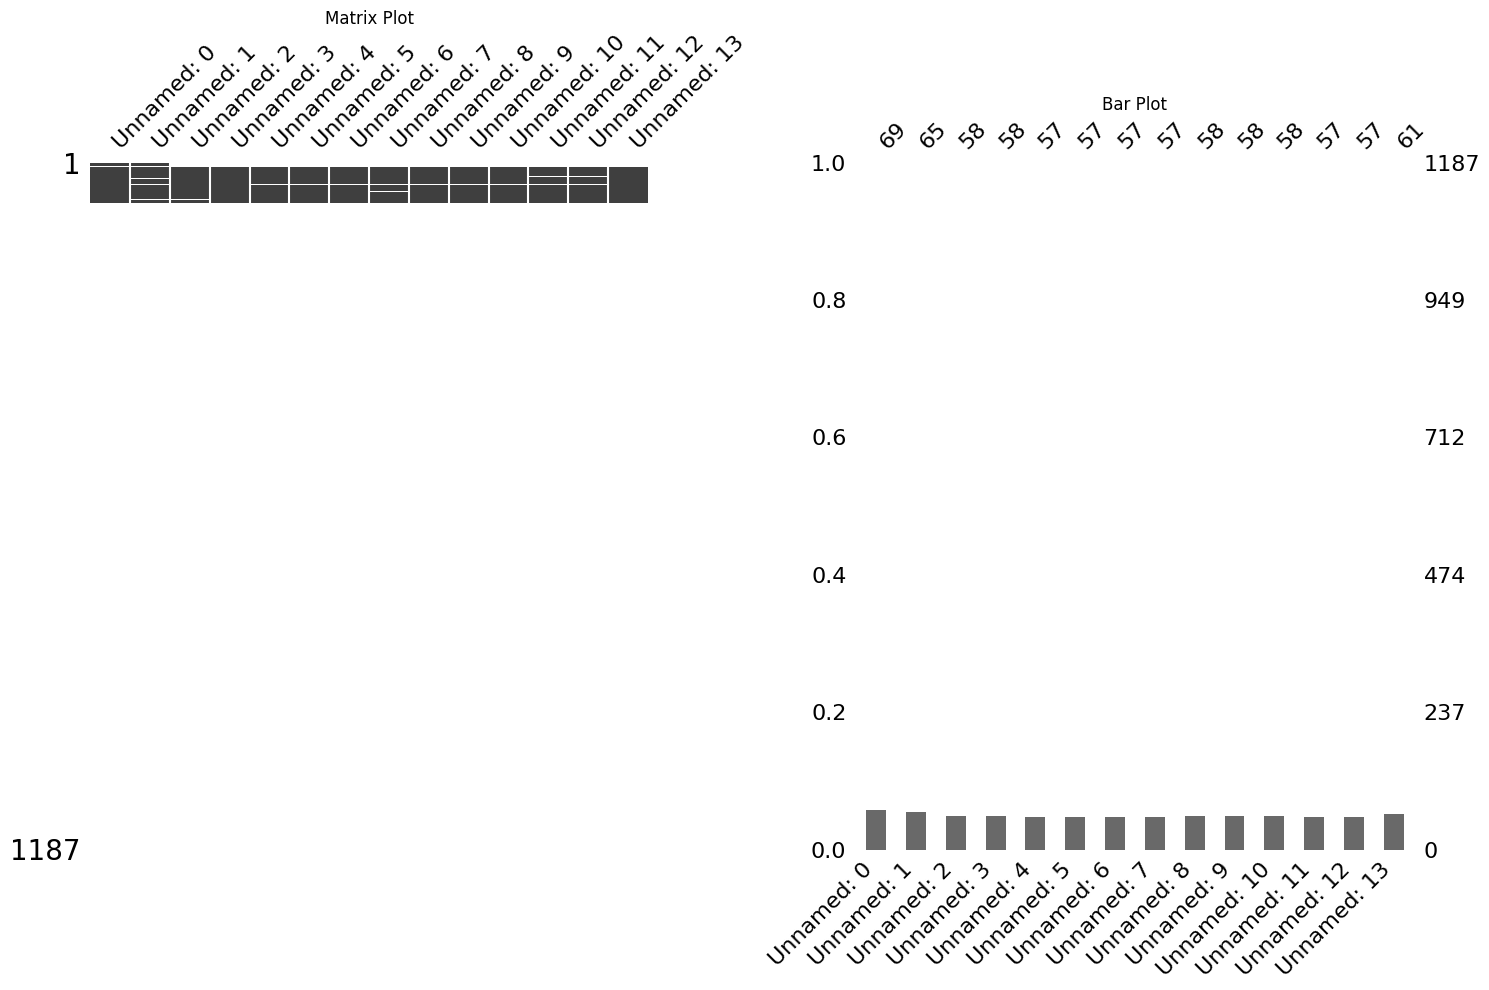

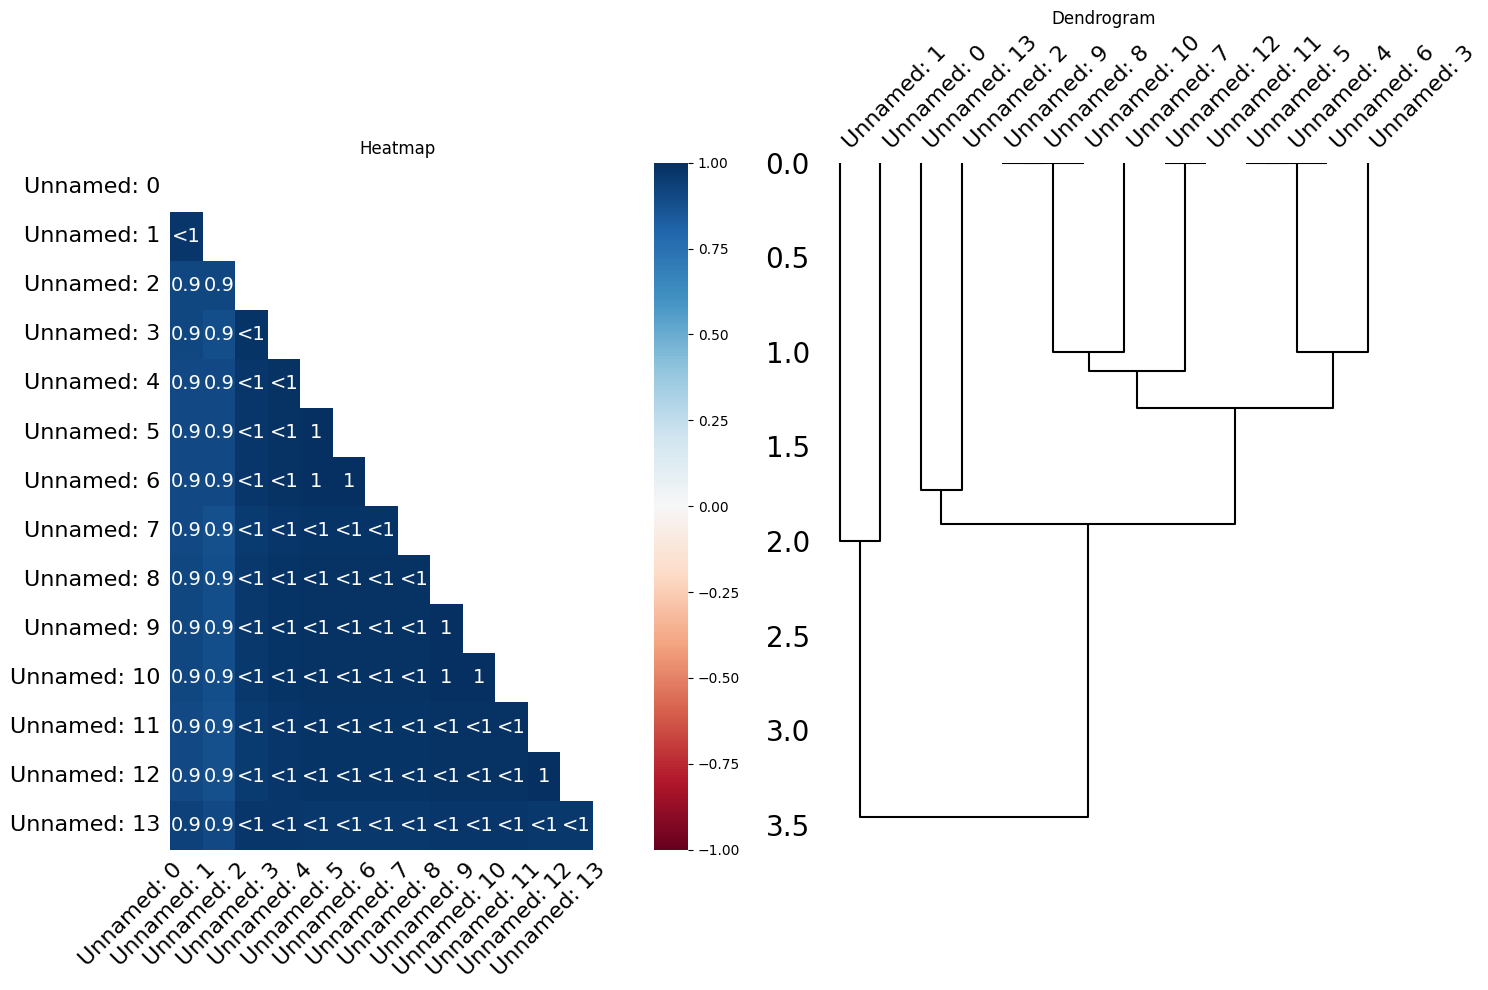

In [70]:
r.visualizar_nulos(prod_p_09_a_18)

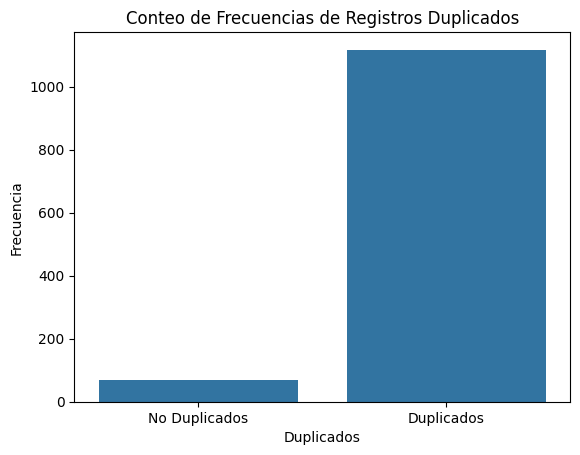

In [71]:
r.hist_duplicados(prod_p_09_a_18)

## YPF en NASDAQ

### Informe general

In [72]:
r.informe_dataframe(nasdaq)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 21
Columnas: 6

--Numero de datos--
126

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 20
Columnas: ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

--Tipo de columnas--
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object
--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

In [73]:
r.verificar_tipo_datos(nasdaq)

nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0         Date  [<class 'str'>]       100.0      0.0      0
1   Close/Last  [<class 'str'>]       100.0      0.0      0
2       Volume  [<class 'int'>]       100.0      0.0      0
3         Open  [<class 'str'>]       100.0      0.0      0
4         High  [<class 'str'>]       100.0      0.0      0
5          Low  [<class 'str'>]       100.0      0.0      0

### Informe particular

In [74]:
for columna in nasdaq:
  r.informe_columna(nasdaq, columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE Date:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
21

--Valores unicos en la columna (Primeros 5 valores)--
['07/10/2024' '07/09/2024' '07/08/2024' '07/05/2024' '07/03/2024']

--Moda de la columna especificada--
Valor modal -----> 07/10/2024
Frecuencia acumulada ------> 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 Date
07/10/2024    1
06/24/2024    1
06/11/2024    1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE Close/Last:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
21

--Valores unicos en la columna (Primeros 5 valores)--
['$21.05' '$20.73' '$20.55' '$20.08' '$20.15']

--Moda

### Gráficos

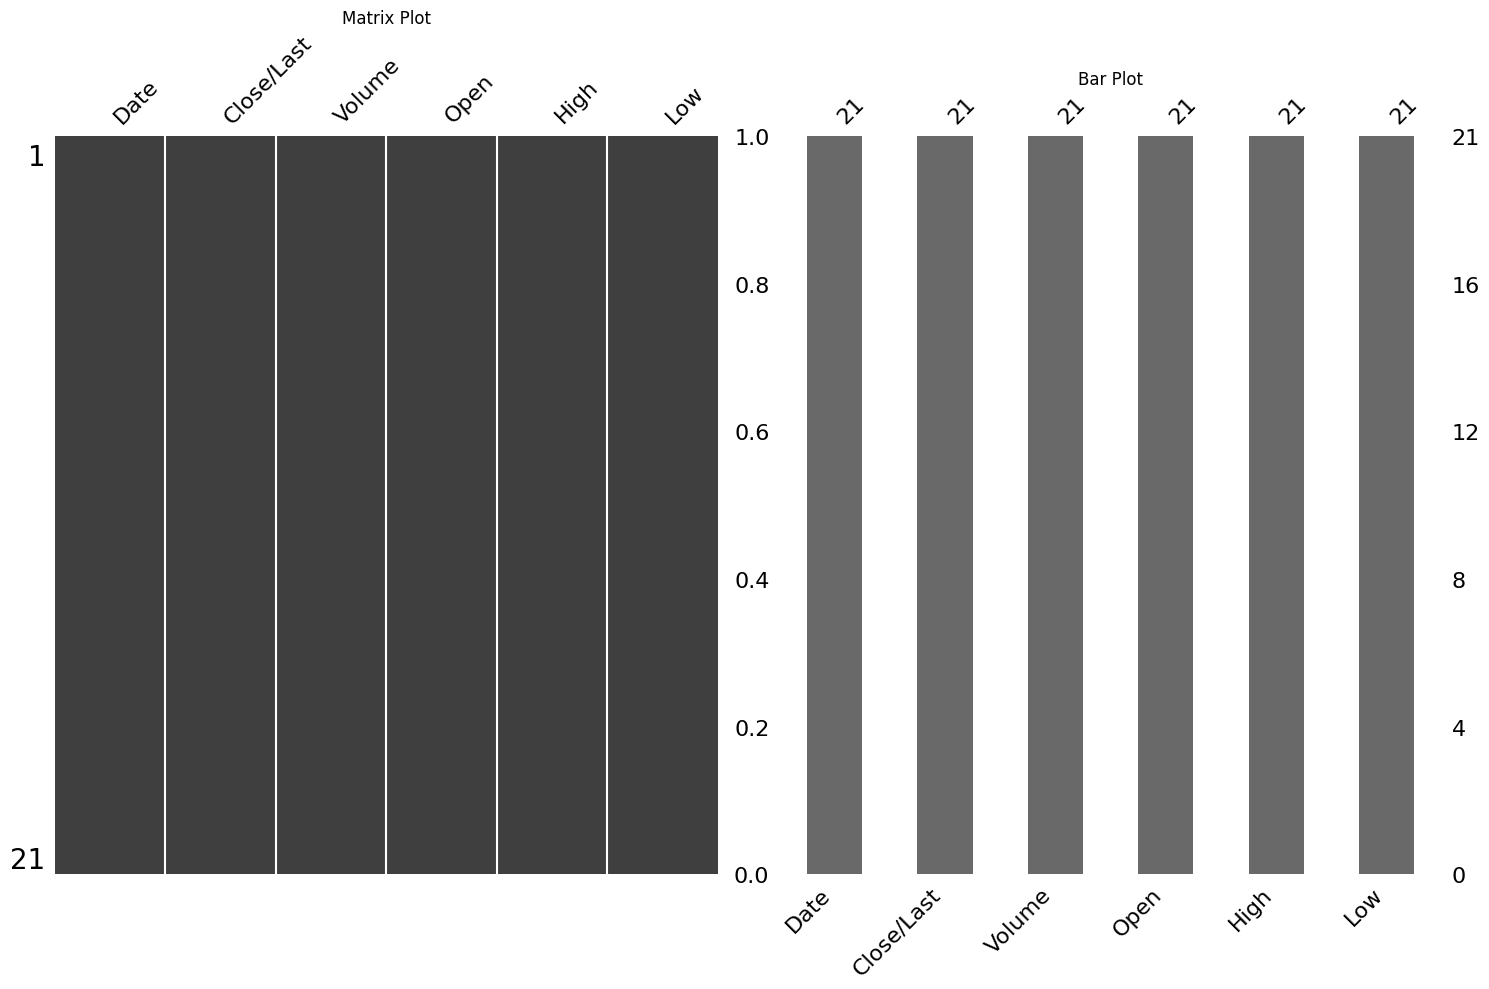

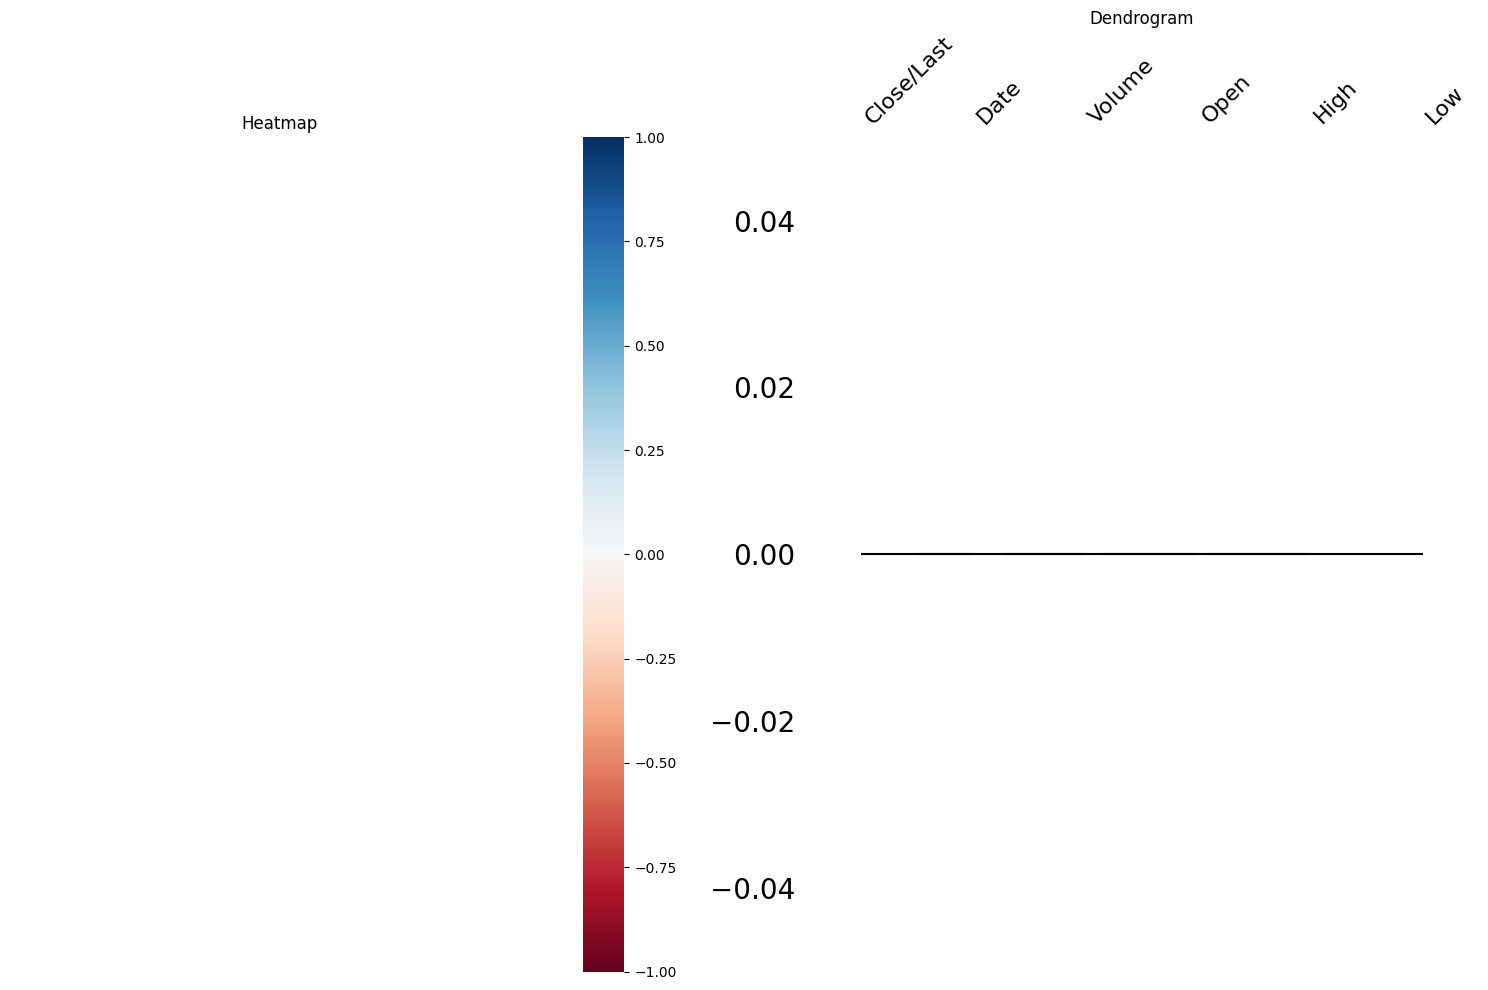

In [75]:
r.visualizar_nulos(nasdaq)

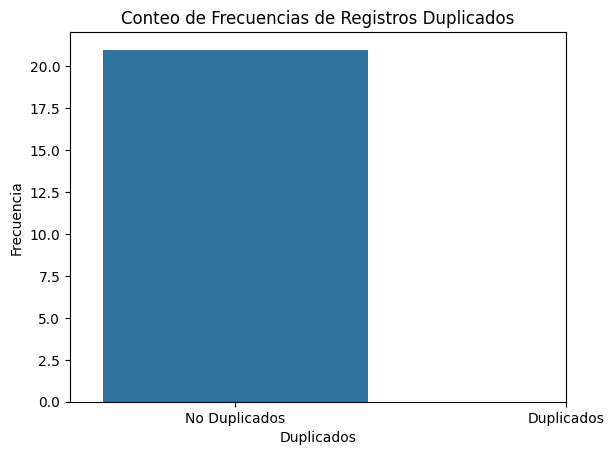

In [76]:
r.hist_duplicados(nasdaq)

# <h1 align= 'center'><u><strong></strong>Conclusiones</u></h1>